# 0 Introduction

La France souffre aujourd'hui de grandes disparités territoriales, en terme d'aménagement, de PIB, de densité de population ou encore de revenu. Ces diparités influent indéniablement sur le résultat des élections présidentielles, mais également sur la participation à ces élections. En effet, on constate une grande variabilité de l'abstention d'une région à l'autre. Cela pose alors des problèmes de représentativité du résultat des éléctions, représentativité que l'on pourrait à juste titre, juger biaisée. A titre d'exemple, la Corse affiche depuis de nombreuse année une abstention supérieure à 50%, contre la Lozère, bien plus mobilisée, qui n'a pas dépassé les 30% depuis 20ans. 

Une conséquence pour la démocratie est alors que son système électorale est jugé biaisé, que les cityens peuvent souffir de ce problème de représentation et à terme, croient moins en leur système politique. A cet égard, la crise des gilets jaunes semble avoir pris majoritairement racine dans ce sentiment de manque ou mauvaise représentation du gouvernement.  Analyser les disparités d'absention en France et determiner les facteurs qui la determinent nous a ainsi semblé d'importance majeure. 

Ainsi au fil de ce projet, nous cherchons à comprendre les raisons de cette différence de taux d'abstention dans les différents départements métropolitains, pour les éléctions présidentielles de 2002 à 2017. Nous récolterons tout d'abord des données d'ordre demographiques sur internet, principalement sur les sites de l'Insee et data.gouv puis les aggrégerons pour former notre base de données. Dans un deuxième temps, nous analyserons le poids de ces différentes variables dans l'explication de l'abstention grâce à des régressions multiples. Enfin, nous essaierons de prédire le taux d'abstention aux prochaines élections présidentielles de 2022. 

### Table des matières

* [PARTIE 1 : La récupération et le traitement des données](#chapter1)
    * [1.1 Lecture des fichiers excel ](#section_1_1)
    * [1.2 Ajout d'une feature construite : la tendance de vote par département ](#section_1_2)
    * [1.3 Ajout d'autres features socio-économiques et géographiques ](#section_1_3)
    * [1.4 Webscrapping : ajout de la densité de population ](#section_1_4)
       
        * [Section 1.2.3](#section_1_2_3)
* [PARTIE 2 : Visualisation](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [PARTIE 3 : Des régressions linéaires](#chapter2)
    * [3.1 Lasso](#section_3_1)
    * [3.2 Essai Elastic net](#section_3_2)

## PARTIE 1 : La récupération et le traitement des données <a class="anchor" id="chapter1"></a>

Nous avons téléchargé des données de l'Insee sur la participation par département pour 2002, 2007, 2012 et 2017, que nous allons importer, nettoyer et assembler.

In [11]:
import pandas as pd
import numpy as np
from math import *
import statistics
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [13]:
import xlrd

### 1.1 Lecture des fichiers excel <a class="anchor" id="section_1_1"></a> 

Ces fichiers sont les fichiers qui constituent la base de notre dataset. Ce sont les données sur l'abstention par département, elles proviennent de l'Insee.

In [16]:
presi_2012 = pd.read_excel('participation_2012_datagouv.xls')

In [17]:
xls = pd.ExcelFile('participation_2012_datagouv.xls')

In [18]:
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [19]:
depa_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")

Petit aperçu de depa_t1_2012, les autres fichiers de cette partie seront globalement sous cette forme

In [20]:
depa_t1_2012.head()

Code du département   Libellé du département  Inscrits  Abstentions  \
0                   1                      AIN    393808        65996   
1                   2                    AISNE    376068        72928   
2                   3                   ALLIER    256275        45266   
3                   4  ALPES DE HAUTE PROVENCE    123933        21034   
4                   5             HAUTES ALPES    106865        18246   

   % Abs/Ins  Votants  % Vot/Ins  Blancs et nuls  % BlNuls/Ins  % BlNuls/Vot  \
0      16.76   327812      83.24            6453          1.64          1.97   
1      19.39   303140      80.61            5196          1.38          1.71   
2      17.66   211009      82.34            5059          1.97          2.40   
3      16.97   102899      83.03            2111          1.70          2.05   
4      17.07    88619      82.93            1842          1.72          2.08   

   ...  Prénom.8  Voix.8  % Voix/Ins.8 % Voix/Exp.8 Sexe.9     Nom.9  \
0  ...   Nicolas    7208          1.83         2.24      M  HOLLANDE   
1  ...   Nicolas    5853          1.56         1.96      M  HOLLANDE   
2  ...   Nicolas    4068          1.59         1.98      M  HOLLANDE   
3  ...   Nicolas    1845          1.49         1.83      M  HOLLANDE   
4  ...   Nicolas    1782          1.67         2.05      M  HOLLANDE   

   Prénom.9  Voix.9  % Voix/Ins.9 % Voix/Exp.9  
0  François   73096         18.56        22.75  
1  François   80751         21.47        27.10  
2  François   61131         23.85        29.68  
3  François   24551         19.81        24.36  
4  François   21248         19.88        24.49  

[5 rows x 73 columns]

On renomme les colonnes intéressantes pour ne pas qu'elles se confondent quand on va concaténer.

In [21]:
depa_t2_2012.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2012.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)
depa_t1_2012.drop(depa_t1_2012.index[96:],0,inplace=True)
depa_t2_2012.drop(depa_t2_2012.index[96:],0,inplace=True)

In [22]:
depa_t2_2012.head()

Code du département   Libellé du département  Inscrits  Abstentions_t2  \
0                   1                      AIN    393866         67279.0   
1                   2                    AISNE    376073         73997.0   
2                   3                   ALLIER    256211         45079.0   
3                   4  ALPES DE HAUTE PROVENCE    123895         20314.0   
4                   5             HAUTES ALPES    106875         17470.0   

   % Abs/Ins_t2   Votants  % Vot/Ins  Blancs et nuls  % BlNuls/Ins  \
0         17.08  326587.0      82.92         19513.0          4.95   
1         19.68  302076.0      80.32         21056.0          5.60   
2         17.59  211132.0      82.41         14924.0          5.82   
3         16.40  103581.0      83.60          6639.0          5.36   
4         16.35   89405.0      83.65          6025.0          5.64   

   % BlNuls/Vot  ...    Prénom      Voix  % Voix/Ins % Voix/Exp Sexe.1  \
0          5.97  ...  François  131333.0       33.34      42.77      M   
1          6.97  ...  François  147260.0       39.16      52.40      M   
2          7.07  ...  François  111615.0       43.56      56.89      M   
3          6.41  ...  François   49498.0       39.95      51.06      M   
4          6.74  ...  François   42435.0       39.71      50.89      M   

     Nom.1  Prénom.1    Voix.1  % Voix/Ins.1 % Voix/Exp.1  
0  SARKOZY   Nicolas  175741.0         44.62        57.23  
1  SARKOZY   Nicolas  133760.0         35.57        47.60  
2  SARKOZY   Nicolas   84593.0         33.02        43.11  
3  SARKOZY   Nicolas   47444.0         38.29        48.94  
4  SARKOZY   Nicolas   40945.0         38.31        49.11  

[5 rows x 25 columns]

In [23]:
depa_t2_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     96 non-null     object 
 1   Libellé du département  96 non-null     object 
 2   Inscrits                96 non-null     int64  
 3   Abstentions_t2          96 non-null     float64
 4   % Abs/Ins_t2            96 non-null     float64
 5   Votants                 96 non-null     float64
 6   % Vot/Ins               96 non-null     float64
 7   Blancs et nuls          96 non-null     float64
 8   % BlNuls/Ins            96 non-null     float64
 9   % BlNuls/Vot            96 non-null     float64
 10  Exprimés                96 non-null     float64
 11  % Exp/Ins               96 non-null     float64
 12  % Exp/Vot               96 non-null     float64
 13  Sexe                    96 non-null     object 
 14  Nom                     96 non-null     obje

On a bien un dataframe pour le tour 2 de 2012 (que l'on a coupé à 95 lignes pour avoir seulement les départements métropolitains) qui nous donne de nombreuses informations sur la particpation dans les différents départements. On va maintenant retenir seulement les colonnes qui nous intéressent (celles sur l'abstention), ajouter l'année, la moyenne sur le tour 1 et le tour 2 et la moyenne nationale, puis agréger les dataframe pour le tour 1 et le tour 2.

In [24]:
df1_2012 = depa_t1_2012[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2012 = depa_t2_2012[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2012 = pd.concat([df1_2012,df2_2012], axis = 1)
depa_t1t2_2012['Année'] = 2012
depa_t1t2_2012['Abs_nat_t1'] = (depa_t1t2_2012['Abstentions_t1'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat_t2'] = (depa_t1t2_2012['Abstentions_t2'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat'] = statistics.mean([depa_t1t2_2012['Abs_nat_t1'][0], depa_t1t2_2012['Abs_nat_t2'][0]])

In [25]:
depa_t1t2_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     96 non-null     object 
 1   Libellé du département  96 non-null     object 
 2   Abstentions_t1          96 non-null     int64  
 3   % Abs/Ins_t1            96 non-null     float64
 4   Inscrits                96 non-null     int64  
 5   Abstentions_t2          96 non-null     float64
 6   % Abs/Ins_t2            96 non-null     float64
 7   Année                   96 non-null     int64  
 8   Abs_nat_t1              96 non-null     float64
 9   Abs_nat_t2              96 non-null     float64
 10  Abs_nat                 96 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 11.1+ KB


In [26]:
depa_t1t2_2012.head()

Code du département   Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
0                   1                      AIN           65996         16.76   
1                   2                    AISNE           72928         19.39   
2                   3                   ALLIER           45266         17.66   
3                   4  ALPES DE HAUTE PROVENCE           21034         16.97   
4                   5             HAUTES ALPES           18246         17.07   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
0    393808         67279.0         17.08   2012   18.627215   18.045958   
1    376068         73997.0         19.68   2012   18.627215   18.045958   
2    256275         45079.0         17.59   2012   18.627215   18.045958   
3    123933         20314.0         16.40   2012   18.627215   18.045958   
4    106865         17470.0         16.35   2012   18.627215   18.045958   

     Abs_nat  
0  18.336586  
1  18.336586  
2  18.336586  
3  18.336586  
4  18.336586

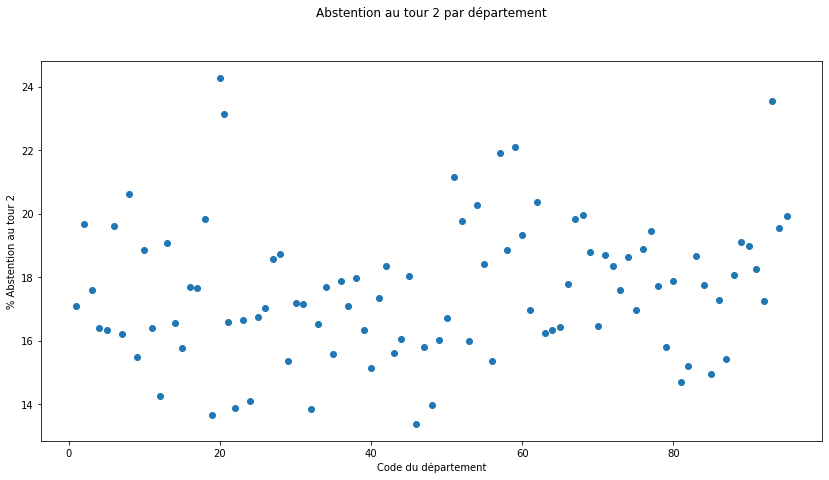

In [27]:
depa_t1t2_2012['Code du département']= depa_t1t2_2012['Code du département'].replace(['2A', '2B'], [20, 20.5])
plt.rcParams["figure.figsize"]=[14,7]
plt.scatter(depa_t1t2_2012['Code du département'], depa_t1t2_2012['% Abs/Ins_t2'])
plt.xlabel("Code du département")
plt.ylabel("% Abstention au tour 2")
plt.title("Abstention au tour 2 par département",y=1.1)
plt.draw()

On remarque de fortes disparités en terme d'abstention au tour 2, même si elle reste gloablement comprise entre 14% et 24%. 

On procède de même pour 2017.

In [31]:
pres_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls')
pres_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls')

In [32]:
xls_1 = pd.ExcelFile('participation_2017_tour1_datagouv.xls')
xls_2 = pd.ExcelFile('participation_2017_tour2_datagouv.xls')

In [33]:
print(xls_1.sheet_names)
print(xls_2.sheet_names)

['FE Metro OM Tour 1', 'Régions Tour 1', 'Départements Tour 1', 'Circo. Leg. Tour 1', 'Canton Tour 1']
['FE Metro OM Tour 2', 'Régions Tour 2', 'Départements Tour 2', 'Circo. Leg. Tour 2', 'Canton Tour 2']


In [34]:
depa_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls', sheet_name = "Départements Tour 1")
depa_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls', sheet_name = "Départements Tour 2")

In [35]:
depa_t2_2017.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2017.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [36]:
depa_t2_2017.drop(depa_t2_2017.index[96:],0,inplace=True)
depa_t1_2017.drop(depa_t1_2017.index[96:],0,inplace=True)

In [37]:
df1_2017 = depa_t1_2017[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2017 = depa_t2_2017[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2017 = pd.concat([df1_2017,df2_2017], axis = 1)
depa_t1t2_2017['Année'] = 2017
depa_t1t2_2017['Abs_nat_t1'] = (depa_t1t2_2017['Abstentions_t1'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat_t2'] = (depa_t1t2_2017['Abstentions_t2'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat'] = statistics.mean([depa_t1t2_2017['Abs_nat_t1'][0], depa_t1t2_2017['Abs_nat_t2'][0]])
print(depa_t1t2_2017.info())
depa_t1t2_2017.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     96 non-null     object 
 1   Libellé du département  96 non-null     object 
 2   Abstentions_t1          96 non-null     int64  
 3   % Abs/Ins_t1            96 non-null     float64
 4   Inscrits                96 non-null     int64  
 5   Abstentions_t2          96 non-null     int64  
 6   % Abs/Ins_t2            96 non-null     float64
 7   Année                   96 non-null     int64  
 8   Abs_nat_t1              96 non-null     float64
 9   Abs_nat_t2              96 non-null     float64
 10  Abs_nat                 96 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 11.1+ KB
None


Code du département   Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
0                   1                      Ain           81507         19.60   
1                   2                    Aisne           80183         21.34   
2                   3                   Allier           54275         21.41   
3                   4  Alpes-de-Haute-Provence           24323         19.22   
4                   5             Hautes-Alpes           20821         18.94   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
0    415886           93130         22.39   2017   19.980885   23.730459   
1    375752           90745         24.15   2017   19.980885   23.730459   
2    253508           59294         23.39   2017   19.980885   23.730459   
3    126578           29255         23.13   2017   19.980885   23.730459   
4    109907           24895         22.65   2017   19.980885   23.730459   

     Abs_nat  
0  21.855672  
1  21.855672  
2  21.855672  
3  21.855672  
4  21.855672

On procède de même pour 2007.

In [38]:
pres_2007 = pd.read_excel('participation_2007_datagouv.xls')

In [39]:
xls = pd.ExcelFile('participation_2007_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [40]:
depa_t1_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2007.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2007.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [41]:
depa_t1_2007.drop(depa_t1_2007.index[96:],0,inplace=True)
depa_t2_2007.drop(depa_t2_2007.index[96:],0,inplace=True)

In [42]:
df1_2007 = depa_t1_2007[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2007 = depa_t2_2007[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2007 = pd.concat([df1_2007,df2_2007], axis = 1)
depa_t1t2_2007['Année'] = 2007
depa_t1t2_2007['Abs_nat_t1'] = (depa_t1t2_2007['Abstentions_t1'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat_t2'] = (depa_t1t2_2007['Abstentions_t2'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat'] = statistics.mean([depa_t1t2_2007['Abs_nat_t1'][0], depa_t1t2_2007['Abs_nat_t2'][0]])
print(depa_t1t2_2007.info())
depa_t1t2_2007.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     96 non-null     object 
 1   Libellé du département  96 non-null     object 
 2   Abstentions_t1          96 non-null     int64  
 3   % Abs/Ins_t1            96 non-null     float64
 4   Inscrits                96 non-null     int64  
 5   Abstentions_t2          96 non-null     int64  
 6   % Abs/Ins_t2            96 non-null     float64
 7   Année                   96 non-null     int64  
 8   Abs_nat_t1              96 non-null     float64
 9   Abs_nat_t2              96 non-null     float64
 10  Abs_nat                 96 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 11.1+ KB
None


Code du département   Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
0                   1                      AIN           52040         13.96   
1                   2                    AISNE           61974         16.42   
2                   3                   ALLIER           38012         14.65   
3                   4  ALPES DE HAUTE PROVENCE           16143         13.57   
4                   5             HAUTES ALPES           14428         14.01   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
0    372899           53428         14.33   2007   14.666156   14.694423   
1    377475           60071         15.91   2007   14.666156   14.694423   
2    259537           38826         14.96   2007   14.666156   14.694423   
3    118936           15140         12.73   2007   14.666156   14.694423   
4    102955           13349         12.95   2007   14.666156   14.694423   

    Abs_nat  
0  14.68029  
1  14.68029  
2  14.68029  
3  14.68029  
4  14.68029

On procède de même pour 2002.

In [43]:
pres_2002 = pd.read_excel('participation_2002_datagouv.xls')
xls = pd.ExcelFile('participation_2002_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [44]:
depa_t1_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2002.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2002.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [45]:
depa_t1_2002.drop(depa_t1_2002.index[96:],0,inplace=True)
depa_t2_2002.drop(depa_t2_2002.index[96:],0,inplace=True)

In [46]:
df1_2002 = depa_t1_2002[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2002 = depa_t2_2002[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2002 = pd.concat([df1_2002,df2_2002], axis = 1)
depa_t1t2_2002['Année'] = 2002
depa_t1t2_2002['Abs_nat_t1'] = (depa_t1t2_2002['Abstentions_t1'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat_t2'] = (depa_t1t2_2002['Abstentions_t2'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat'] = statistics.mean([depa_t1t2_2002['Abs_nat_t1'][0], depa_t1t2_2002['Abs_nat_t2'][0]])
print(depa_t1t2_2002.info())
depa_t1t2_2002.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     96 non-null     object 
 1   Libellé du département  96 non-null     object 
 2   Abstentions_t1          96 non-null     float64
 3   % Abs/Ins_t1            96 non-null     float64
 4   Inscrits                96 non-null     int64  
 5   Abstentions_t2          96 non-null     int64  
 6   % Abs/Ins_t2            96 non-null     float64
 7   Année                   96 non-null     int64  
 8   Abs_nat_t1              96 non-null     float64
 9   Abs_nat_t2              96 non-null     float64
 10  Abs_nat                 96 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 11.1+ KB
None


Code du département   Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
0                   1                      AIN         89002.0         26.31   
1                   2                    AISNE         96157.0         26.21   
2                   3                   ALLIER         67066.0         26.19   
3                   4  ALPES DE HAUTE PROVENCE         26555.0         24.38   
4                   5             HAUTES ALPES         23051.0         24.24   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
0    338220           64394         19.04   2002   27.156831   19.052574   
1    366810           71788         19.57   2002   27.156831   19.052574   
2    256113           48994         19.13   2002   27.156831   19.052574   
3    108943           18812         17.27   2002   27.156831   19.052574   
4     95100           16533         17.39   2002   27.156831   19.052574   

     Abs_nat  
0  23.104703  
1  23.104703  
2  23.104703  
3  23.104703  
4  23.104703

On concatène les quatre datasets pour avoir un seul dataframe sur les quatres années (2002, 2007, 2012, 2017).

In [47]:
dep_abs = pd.concat([depa_t1t2_2017, depa_t1t2_2012, depa_t1t2_2007, depa_t1t2_2002], axis = 0)
dep_abs.sort_values(by = 'Année', ascending = False, inplace = True)
dep_abs.reset_index(inplace = True)
dep_abs.drop('index', axis = 1, inplace = True)
print(dep_abs.info())
dep_abs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     384 non-null    object 
 1   Libellé du département  384 non-null    object 
 2   Abstentions_t1          384 non-null    float64
 3   % Abs/Ins_t1            384 non-null    float64
 4   Inscrits                384 non-null    int64  
 5   Abstentions_t2          384 non-null    float64
 6   % Abs/Ins_t2            384 non-null    float64
 7   Année                   384 non-null    int64  
 8   Abs_nat_t1              384 non-null    float64
 9   Abs_nat_t2              384 non-null    float64
 10  Abs_nat                 384 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 33.1+ KB
None


Code du département Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
0                   1                    Ain         81507.0         19.60   
1                  49         Maine-et-Loire         97038.0         17.04   
2                  71         Saône-et-Loire         86784.0         21.35   
3                  70            Haute-Saône         34976.0         19.52   
4                  69                  Rhône        249073.0         21.55   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
0    415886         93130.0         22.39   2017   19.980885   23.730459   
1    569425        121568.0         21.36   2017   19.980885   23.730459   
2    406418         94636.0         23.29   2017   19.980885   23.730459   
3    179214         37287.0         20.81   2017   19.980885   23.730459   
4   1155604        289848.0         25.08   2017   19.980885   23.730459   

     Abs_nat  
0  21.855672  
1  21.855672  
2  21.855672  
3  21.855672  
4  21.855672

On a bien un dataframe à 386 lignes qui représentent les quatres années sur lesquelles on travaille. On ajoute la colonne de la moyenne de l'abstention au tour 1 et au tour 2 pour chaque département.

In [51]:
dep_abs['% Abs/Ins'] = dep_abs[['% Abs/Ins_t1', '% Abs/Ins_t2']].mean(axis = 1)

In [53]:
dep_abs.info()
dep_abs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     384 non-null    object 
 1   Libellé du département  384 non-null    object 
 2   Abstentions_t1          384 non-null    float64
 3   % Abs/Ins_t1            384 non-null    float64
 4   Inscrits                384 non-null    int64  
 5   Abstentions_t2          384 non-null    float64
 6   % Abs/Ins_t2            384 non-null    float64
 7   Année                   384 non-null    int64  
 8   Abs_nat_t1              384 non-null    float64
 9   Abs_nat_t2              384 non-null    float64
 10  Abs_nat                 384 non-null    float64
 11  % Abs/Ins               384 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 36.1+ KB


Code du département Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
0                   1                    Ain         81507.0         19.60   
1                  49         Maine-et-Loire         97038.0         17.04   
2                  71         Saône-et-Loire         86784.0         21.35   
3                  70            Haute-Saône         34976.0         19.52   
4                  69                  Rhône        249073.0         21.55   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
0    415886         93130.0         22.39   2017   19.980885   23.730459   
1    569425        121568.0         21.36   2017   19.980885   23.730459   
2    406418         94636.0         23.29   2017   19.980885   23.730459   
3    179214         37287.0         20.81   2017   19.980885   23.730459   
4   1155604        289848.0         25.08   2017   19.980885   23.730459   

     Abs_nat  % Abs/Ins  
0  21.855672     20.995  
1  21.855672     19.200  
2  21.855672     22.320  
3  21.855672     20.165  
4  21.855672     23.315

On trie sur les codes de départements. Ce sera le tri qu'on gardera pour la suite et qui nous servira de 'left on' pour merger les prochains dataframe.

In [54]:
dep_abs['Code du département']= dep_abs['Code du département'].replace(['2A', '2B'], [20, 20.5])
dep_abs.sort_values(by = ['Année','Code du département'] , ascending = False, inplace = True)
dep_abs.head()

Code du département Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
28                 95.0             Val-d'Oise        167560.0         22.94   
29                 94.0           Val-de-Marne        164068.0         20.89   
30                 93.0      Seine-Saint-Denis        210952.0         27.51   
31                 92.0         Hauts-de-Seine        176715.0         17.91   
32                 91.0                Essonne        157440.0         19.80   

    Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
28    730497        204202.0         27.96   2017   19.980885   23.730459   
29    785540        207455.0         26.41   2017   19.980885   23.730459   
30    766894        249213.0         32.49   2017   19.980885   23.730459   
31    986730        226846.0         23.06   2017   19.980885   23.730459   
32    795227        199441.0         25.08   2017   19.980885   23.730459   

      Abs_nat  % Abs/Ins  
28  21.855672     25.450  
29  21.855672     23.650  
30  21.855672     30.000  
31  21.855672     20.485  
32  21.855672     22.440

Jetons un oeil à l'évolution de l'abstention national depuis 2002

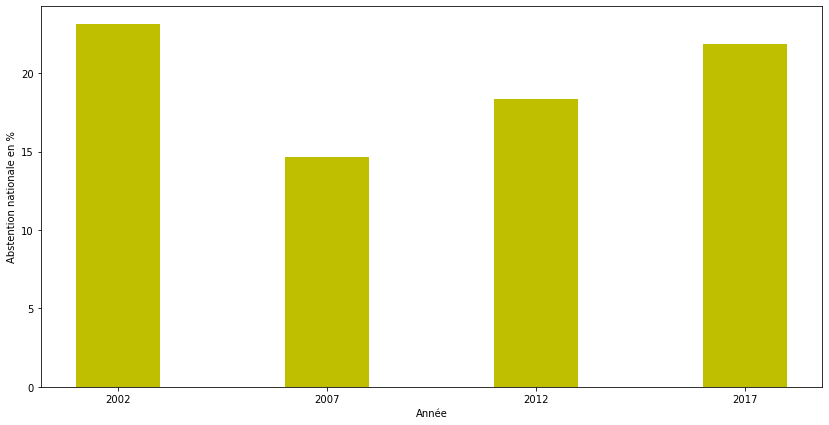

In [55]:
Année = ['2002', '2007', '2012', '2017']
val_2002 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2002].index[0]]
val_2007 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2007].index[0]]
val_2012 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2012].index[0]]
val_2017 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2017].index[0]]
Abstention = [val_2002, val_2007, val_2012, val_2017]
plt.bar(Année, Abstention, width = 0.4, color = 'y')
plt.ylabel('Abstention nationale en %')
plt.xlabel('Année')
plt.show()

Après avoir baissé en 2007, elle est globalement en constante augmentation depuis.

### 1.2 Ajout d'une feature construite : la tendance de vote par département <a class="anchor" id="section_1_2"></a>

Chaque département affiche une "tendance politique". On pourrait imaginer que les départements votant dans les extrêmes par exemple, sont plus engagés lors des élections, d'ou un abstention moins forte. Dans le but d'expliquer l'abstention, nous créons alors un indice pour quantifier la tendance de vote d'un département. Cet indicie pourra être supprimé a posteriori s'il est jugé incohérent ou faussant les résultats.

En 2012, il y a dix candidats au premier tour. Nous notons chaque candidat sur l'échelle Gauche-Droite s'étendant de -10(G) à +10(D). On pondère ensuite par le nombre de vote pour ce candidat, et on abouti à l'indice de tendance de vote du département. 

On nomme les fichier sur lesquels on va extraire la tendance de vote des départements.

In [56]:
trend_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")
trend_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls', sheet_name = "Départements Tour 1")
trend_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls', sheet_name = "Départements Tour 2")
trend_t1_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T2")
trend_t1_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T2")

On donne une valeur à tous les candidats aux élections 2002, 2007, 2012, 2017.

In [57]:
echelle = {"MACRON": 0 ,"HAMON": -5 ,"LASSALLE": 2 ,"ASSELINEAU": 9 ,"FILLON": 5 ,"JOLY": -7, "LE PEN" : 10, "SARKOZY": 6,"MÉLENCHON" : -9 ,"POUTOU" : -10,"ARTHAUD" : -10,"CHEMINADE" : -5,"BAYROU" : 0,"DUPONT-AIGNAN": 8,"HOLLANDE" : -4 , "MEGRET" : 10 ,"LEPAGE": 0,"GLUCKSTEIN": -7,"CHIRAC": 4,"TAUBIRA": -4,"SAINT-JOSSE": 6,"MAMERE": -8,"JOSPIN": -3,"BOUTIN": 3, "HUE": -2,"CHEVENEMENT": -3,"MADELIN": 3,"LAGUILLER": -10,"BESANCENOT": -8,"BUFFET": -10,"SCHIVARDI": -7,"BOVÉ": -9,"VOYNET": -5,"de VILLIERS": 8,"ROYAL": -2,"NIHOUS": 3}


On code une fonction qui calcule la tendance de vote d'un département, à partir du fichier où sont stoqués les résultats des élections, pour une année et un tour donnés.

In [58]:
def indice_tendance(df, code_dep,echelle,nb_cand):
    #trouver la ligne l du dep dans le dataset
    l = df.loc[df['Code du département'] == code_dep]
    i = 0 #indice de tendance
    tab = l.reset_index().values[0].tolist() # convert en liste

  
    for j in range(nb_cand):
        nom = tab[15+6*j] 
        val = echelle[nom]
        i += val * tab[19+6*j] 
        # les lignes ont toutes la meme structure : le premier nom est en colonne 14, puis le suivant en +6, +6, ...
        # on multiplie la note d'un candidat par le pourcentage de voix parmis les exprimés
    return i*0.01

#On note que pour 2002 :16 , 2007 :12 ,2012 :10 ,2017 :11 candidats


Par exemple, pour la Corse au tour 1 en 2012 :

In [59]:
indice_tendance(trend_t1_2012, '2A' ,echelle,10)

2.4876

Il semble ainsi qu'en 2012, la Haute-Corse ait tendance à votr à centre-droite.

Le fichier 2017 demande une modification de forme

In [60]:
trend_t1_2017.columns
trend_t1_2017.drop(["Nuls", "% Nuls/Ins", "% Nuls/Vot"],axis = 1, inplace = True)

In [61]:
df = pd.DataFrame([i for i in range(384)])

Pour chacune des 4 élections, on calcule la tedance pour chaque département, et on l'ajoute au dataset :

In [62]:
#on ajoute la colonne

indice_t1_2002 = []
indice_t1_2007 = []
indice_t1_2012 = []
indice_t1_2017 = []

liste_dep =trend_t1_2012['Code du département'].tolist()[:96]

for i in liste_dep: 
    indice_t1_2002 += [indice_tendance(trend_t1_2002, i, echelle,16)]
for i in liste_dep: 
    indice_t1_2007 += [indice_tendance(trend_t1_2007, i, echelle,12)]
for i in liste_dep: 
    indice_t1_2012 += [indice_tendance(trend_t1_2012, i, echelle,10)]
for i in liste_dep: 
    indice_t1_2017 += [indice_tendance(trend_t1_2017, i, echelle,11)]

indice = indice_t1_2002 + indice_t1_2007 + indice_t1_2012 + indice_t1_2017

dep_abs['indice_tendance'] = indice

print(dep_abs)

     Code du département   Libellé du département  Abstentions_t1  \
28                  95.0               Val-d'Oise        167560.0   
29                  94.0             Val-de-Marne        164068.0   
30                  93.0        Seine-Saint-Denis        210952.0   
31                  92.0           Hauts-de-Seine        176715.0   
32                  91.0                  Essonne        157440.0   
..                   ...                      ...             ...   
354                  5.0             HAUTES ALPES         23051.0   
355                  4.0  ALPES DE HAUTE PROVENCE         26555.0   
356                  3.0                   ALLIER         67066.0   
357                  2.0                    AISNE         96157.0   
358                  1.0                      AIN         89002.0   

     % Abs/Ins_t1  Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  \
28          22.94    730497        204202.0         27.96   2017   19.980885   
29         

Ajout de la feature "tendance du gouvernement au pouvoir avant l'éléction"



In [63]:
tendance_précédante = [3 for k in range(96)] + [3 for k in range(96)] + [6 for k in range(96)] + [-4 for k in range(96)]
#-4 car avant 2017,Hollande ie -4
dep_abs['tendance_précédante'] = tendance_précédante
print(dep_abs)


     Code du département   Libellé du département  Abstentions_t1  \
28                  95.0               Val-d'Oise        167560.0   
29                  94.0             Val-de-Marne        164068.0   
30                  93.0        Seine-Saint-Denis        210952.0   
31                  92.0           Hauts-de-Seine        176715.0   
32                  91.0                  Essonne        157440.0   
..                   ...                      ...             ...   
354                  5.0             HAUTES ALPES         23051.0   
355                  4.0  ALPES DE HAUTE PROVENCE         26555.0   
356                  3.0                   ALLIER         67066.0   
357                  2.0                    AISNE         96157.0   
358                  1.0                      AIN         89002.0   

     % Abs/Ins_t1  Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  \
28          22.94    730497        204202.0         27.96   2017   19.980885   
29         

Ajout de la feature ecart entre la tendance du departement et la tendance du gouvernement au pouvoir au moment de l'élection.

In [64]:
dep_abs['ecart_a_la_tendance'] = dep_abs['indice_tendance']- dep_abs['tendance_précédante'] 
print(dep_abs)

     Code du département   Libellé du département  Abstentions_t1  \
28                  95.0               Val-d'Oise        167560.0   
29                  94.0             Val-de-Marne        164068.0   
30                  93.0        Seine-Saint-Denis        210952.0   
31                  92.0           Hauts-de-Seine        176715.0   
32                  91.0                  Essonne        157440.0   
..                   ...                      ...             ...   
354                  5.0             HAUTES ALPES         23051.0   
355                  4.0  ALPES DE HAUTE PROVENCE         26555.0   
356                  3.0                   ALLIER         67066.0   
357                  2.0                    AISNE         96157.0   
358                  1.0                      AIN         89002.0   

     % Abs/Ins_t1  Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  \
28          22.94    730497        204202.0         27.96   2017   19.980885   
29         

In [65]:
dep_abs.head()

Code du département Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
28                 95.0             Val-d'Oise        167560.0         22.94   
29                 94.0           Val-de-Marne        164068.0         20.89   
30                 93.0      Seine-Saint-Denis        210952.0         27.51   
31                 92.0         Hauts-de-Seine        176715.0         17.91   
32                 91.0                Essonne        157440.0         19.80   

    Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  \
28    730497        204202.0         27.96   2017   19.980885   23.730459   
29    785540        207455.0         26.41   2017   19.980885   23.730459   
30    766894        249213.0         32.49   2017   19.980885   23.730459   
31    986730        226846.0         23.06   2017   19.980885   23.730459   
32    795227        199441.0         25.08   2017   19.980885   23.730459   

      Abs_nat  % Abs/Ins  indice_tendance  tendance_précédante  \
28  21.855672     25.450           1.7450                    3   
29  21.855672     23.650           1.2429                    3   
30  21.855672     30.000           0.6263                    3   
31  21.855672     20.485           1.0753                    3   
32  21.855672     22.440           0.8014                    3   

    ecart_a_la_tendance  
28              -1.2550  
29              -1.7571  
30              -2.3737  
31              -1.9247  
32              -2.1986

### 1.3 Ajout d'autres features socio-économiques et géographiques <a class="anchor" id="section_1_3"></a>

On ajoute ici un maximum de features potentiellement explicative. Les données proviennent de l'Insee ou d'autres sites publiques et sont sous la forme excel ou csv.

### Création d'un dataframe pour la pop active qu'on rajoute à dep_abs (fichier excel ; Insee)

In [66]:
dep_test = dep_abs

In [67]:
pop_active_dep = pd.read_excel('pop_active_dep.xls')
xls_1 = pd.ExcelFile('pop_active_dep.xls')
print(xls_1.sheet_names)

['Présentation', 'Documentation', 'Modifications_territoriales', 'DEP_1968', 'Feuil1', 'DEP_1975', 'DEP_1982', 'DEP_1990', 'DEP_1999', 'DEP_2007', 'Feuil2', 'Feuil3', 'DEP_2012', 'DEP_2017', 'COM_1968', 'COM_1975', 'COM_1982', 'COM_1990', 'COM_1999', 'COM_2007', 'COM_2012', 'COM_2017']


In [68]:
pop_active_dep_2017 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2017")
pop_active_dep_2012 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2012")
pop_active_dep_2007 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2007")

In [69]:
pop_active_dep_2007.head()

Région Département  Libellé de\ndépartement  \
0      84          01                      Ain   
1      32          02                    Aisne   
2      84          03                   Allier   
3      93          04  Alpes-de-Haute-Provence   
4      93          05             Hautes-Alpes   

   Hommes\nActifs ayant un emploi\nRP2007  Hommes\nChômeurs\nRP2007  \
0                           109810.392249               5855.654534   
1                            90370.011975               9778.083430   
2                            55513.243104               4964.595328   
3                            24917.278986               2207.804139   
4                            23369.708505               1462.930012   

   Femmes\nActifs ayant un emploi\nRP2007  Femmes\nChômeurs\nRP2007  
0                            96114.134637               8838.252354  
1                            73452.195603              11727.535490  
2                            48743.646800               6315.471962  
3                            21909.413608               3446.285706  
4                            20876.013426               1936.817092

On cut pour les mêmes raisons que dans la P1.

In [70]:
pop_active_dep_2017.drop(pop_active_dep_2017.index[96:],0,inplace=True)
pop_active_dep_2012.drop(pop_active_dep_2012.index[96:],0,inplace=True)
pop_active_dep_2007.drop(pop_active_dep_2007.index[96:],0,inplace=True)

In [71]:
pop_active_dep_2017.rename(columns={'Hommes\nActifs ayant un emploi\nRP2017': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2017': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2017' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2017' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2012.rename(columns={'Hommes\nActifs ayant un emploi\nRP2012': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2012': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2012' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2012' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2007.rename(columns={'Hommes\nActifs ayant un emploi\nRP2007': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2007': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2007' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2007' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2017['Année de contrôle'] = 2017
pop_active_dep_2012['Année de contrôle'] = 2012
pop_active_dep_2007['Année de contrôle'] = 2007

In [72]:
print(pop_active_dep_2007.info())
pop_active_dep_2007.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Région                          96 non-null     int64  
 1   Département                     96 non-null     object 
 2   Libellé de
département          96 non-null     object 
 3   Hommes actifs ayant un emplois  96 non-null     float64
 4   Hommes chômeurs                 96 non-null     float64
 5   Femmes actifs ayant un emploi   96 non-null     float64
 6   Femmes chomeurs                 96 non-null     float64
 7   Année de contrôle               96 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.8+ KB
None


Région Département  Libellé de\ndépartement  \
0      84          01                      Ain   
1      32          02                    Aisne   
2      84          03                   Allier   
3      93          04  Alpes-de-Haute-Provence   
4      93          05             Hautes-Alpes   

   Hommes actifs ayant un emplois  Hommes chômeurs  \
0                   109810.392249      5855.654534   
1                    90370.011975      9778.083430   
2                    55513.243104      4964.595328   
3                    24917.278986      2207.804139   
4                    23369.708505      1462.930012   

   Femmes actifs ayant un emploi  Femmes chomeurs  Année de contrôle  
0                   96114.134637      8838.252354               2007  
1                   73452.195603     11727.535490               2007  
2                   48743.646800      6315.471962               2007  
3                   21909.413608      3446.285706               2007  
4                   20876.013426      1936.817092               2007

On concatène les dataframe pour 2017, 2012, et 2007 en triant sur l'année et sur le code du département.

In [73]:
pop_active = pd.concat([pop_active_dep_2017, pop_active_dep_2012, pop_active_dep_2007], axis = 0)
pop_active.sort_values(by = ['Année de contrôle'], ascending = False, inplace = True)
pop_active.reset_index(inplace = True)
pop_active.drop('index', axis = 1, inplace = True)
pop_active.drop(['Libellé de\ndépartement', 'Région'], axis = 1, inplace = True)
pop_active['Département']= pop_active['Département'].replace(['2A', '2B'], [20, 20.5])
pop_active.sort_values(by = ['Année de contrôle','Département'] , ascending = False, inplace = True)
pop_active['Département'] = pop_active['Département'].astype('float')
pop_active.head()

Département  Hommes actifs ayant un emplois  Hommes chômeurs  \
27         95.0                   202330.736405     24473.437851   
28         94.0                   232683.579938     28846.463298   
29         93.0                   261365.092643     49701.409911   
30         92.0                   289642.276543     29711.222271   
31         91.0                   219302.220101     21464.541366   

    Femmes actifs ayant un emploi  Femmes chomeurs  Année de contrôle  
27                  191843.734957     28403.387385               2017  
28                  230727.486920     32598.061497               2017  
29                  229502.466161     51767.902234               2017  
30                  291798.856451     34749.561416               2017  
31                  209302.810559     26057.601334               2017

In [74]:
#dep_abs = pd.concat([dep_test, pop_active], axis = 1)
#dep_abs.drop('Année de contrôle', axis = 1, inplace = True)

On rajoute des colonnes sur la somme des chômeurs Femmes, Hommes et totale.

In [75]:
pop_active['pop active ayant un emploi'] = pop_active[['Hommes actifs ayant un emplois', 'Femmes actifs ayant un emploi']].sum(axis = 1)
pop_active['pop chômeurs'] = pop_active[['Hommes chômeurs', 'Femmes chomeurs']].sum(axis = 1)

In [76]:
pop_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 27 to 243
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Département                     288 non-null    float64
 1   Hommes actifs ayant un emplois  288 non-null    float64
 2   Hommes chômeurs                 288 non-null    float64
 3   Femmes actifs ayant un emploi   288 non-null    float64
 4   Femmes chomeurs                 288 non-null    float64
 5   Année de contrôle               288 non-null    int64  
 6   pop active ayant un emploi      288 non-null    float64
 7   pop chômeurs                    288 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.2 KB


### Création d'un dataframe pour la population par grande classe d'âge (fichier excel, Insee)

In [92]:
age_pop_dep = pd.read_excel('age_pop_dep.xlsx')
xls_1 = pd.ExcelFile('age_pop_dep.xlsx')
print(xls_1.sheet_names)

['À savoir', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975']


In [93]:
age_pop_dep_2017 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2017")
age_pop_dep_2012 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2012")
age_pop_dep_2007 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2007")
age_pop_dep_2002 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2002")

In [94]:
age_pop_dep_2017.drop(age_pop_dep_2017.index[96:],0,inplace=True)
age_pop_dep_2012.drop(age_pop_dep_2012.index[96:],0,inplace=True)
age_pop_dep_2007.drop(age_pop_dep_2007.index[96:],0,inplace=True)
age_pop_dep_2002.drop(age_pop_dep_2002.index[96:],0,inplace=True)

In [95]:
age_pop_dep_2002['Année de contrôle'] = 2002
age_pop_dep_2007['Année de contrôle'] = 2007
age_pop_dep_2012['Année de contrôle'] = 2012
age_pop_dep_2017['Année de contrôle'] = 2017

In [96]:
print(age_pop_dep_2002.info())
age_pop_dep_2002.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               96 non-null     object
 1   Départements             96 non-null     object
 2   Ensemble 0 à 19 ans      96 non-null     int64 
 3   Ensemble 20 à 39 ans     96 non-null     int64 
 4   Ensemble 40 à 59 ans     96 non-null     int64 
 5   Ensemble 60 à 74 ans     96 non-null     int64 
 6   Ensemble 75 ans et plus  96 non-null     int64 
 7   Ensemble Total           96 non-null     int64 
 8   H 0 à 19 ans             96 non-null     int64 
 9   H 20 à 39 ans            96 non-null     int64 
 10   H 40 à 59 ans           96 non-null     int64 
 11  H 60 à 74 ans            96 non-null     int64 
 12  H 75 ans et plus         96 non-null     int64 
 13  H Total                  96 non-null     int64 
 14  F 0 à 19 ans             96 non-null     int

Unnamed: 0             Départements  Ensemble 0 à 19 ans  \
0         01                      Ain               146640   
1         02                    Aisne               145835   
2         03                   Allier                72876   
3         04  Alpes-de-Haute-Provence                34434   
4         05             Hautes-Alpes                30512   

   Ensemble 20 à 39 ans  Ensemble 40 à 59 ans  Ensemble 60 à 74 ans  \
0                145248                146194                 62718   
1                138617                143369                 69349   
2                 80217                 94450                 58224   
3                 33536                 40312                 23687   
4                 30821                 34593                 18193   

   Ensemble 75 ans et plus  Ensemble Total  H 0 à 19 ans  H 20 à 39 ans  ...  \
0                    34816          535616         75084          73352  ...   
1                    39614          536784         74255          69835  ...   
2                    38588          344355         37362          40573  ...   
3                    13781          145750         17741          16584  ...   
4                    11168          125287         15675          15460  ...   

   H 60 à 74 ans  H 75 ans et plus  H Total  F 0 à 19 ans  F 20 à 39 ans  \
0          30174             12797   265305         71556          71896   
1          31407             14189   261842         71580          68782   
2          26366             14279   165335         35514          39644   
3          11364              5309    71103         16693          16952   
4           8662              4276    61426         14837          15361   

   F 40 à 59 ans  F 60 à 74 ans  F 75 ans et plus  F Total  Année de contrôle  
0          72296          32544             22019   270311               2002  
1          71213          37942             25425   274942               2002  
2          47695          31858             24309   179020               2002  
3          20207          12323              8472    74647               2002  
4          17240           9531              6892    63861               2002  

[5 rows x 21 columns]

On remarque que les datasets sont mal lus et pour cause une présence d'une forme de multiindex dans le fichier excel. Ce n'est pas très grave car les colonnes qui nous intéressent sont globalement à la bonne place et bien nommées.

In [97]:
age_pop_dep_2002.rename(columns = {' H 40 à 59 ans': 'H 40 à 59 ans'}, inplace = True)

On concatène les dataframe.

In [98]:
age_pop_dep = pd.concat([age_pop_dep_2002, age_pop_dep_2007, age_pop_dep_2012, age_pop_dep_2017], axis = 0)
print(age_pop_dep.info())
age_pop_dep.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 95
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               384 non-null    object 
 1   Départements             384 non-null    object 
 2   Ensemble 0 à 19 ans      384 non-null    int64  
 3   Ensemble 20 à 39 ans     384 non-null    int64  
 4   Ensemble 40 à 59 ans     384 non-null    int64  
 5   Ensemble 60 à 74 ans     384 non-null    int64  
 6   Ensemble 75 ans et plus  384 non-null    int64  
 7   Ensemble Total           384 non-null    int64  
 8   H 0 à 19 ans             384 non-null    int64  
 9   H 20 à 39 ans            384 non-null    int64  
 10  H 40 à 59 ans            384 non-null    int64  
 11  H 60 à 74 ans            384 non-null    int64  
 12  H 75 ans et plus         384 non-null    int64  
 13  H Total                  384 non-null    int64  
 14  F 0 à 19 ans             38

Unnamed: 0             Départements  Ensemble 0 à 19 ans  \
0         01                      Ain               146640   
1         02                    Aisne               145835   
2         03                   Allier                72876   
3         04  Alpes-de-Haute-Provence                34434   
4         05             Hautes-Alpes                30512   

   Ensemble 20 à 39 ans  Ensemble 40 à 59 ans  Ensemble 60 à 74 ans  \
0                145248                146194                 62718   
1                138617                143369                 69349   
2                 80217                 94450                 58224   
3                 33536                 40312                 23687   
4                 30821                 34593                 18193   

   Ensemble 75 ans et plus  Ensemble Total  H 0 à 19 ans  H 20 à 39 ans  ...  \
0                    34816          535616         75084          73352  ...   
1                    39614          536784         74255          69835  ...   
2                    38588          344355         37362          40573  ...   
3                    13781          145750         17741          16584  ...   
4                    11168          125287         15675          15460  ...   

   F 60 à 74 ans  F 75 ans et plus  F Total  Année de contrôle  Unnamed: 20  \
0          32544             22019   270311               2002          NaN   
1          37942             25425   274942               2002          NaN   
2          31858             24309   179020               2002          NaN   
3          12323              8472    74647               2002          NaN   
4           9531              6892    63861               2002          NaN   

   Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 27 columns]

In [99]:
age_pop_dep.rename(columns = {'Unnamed: 0': 'Code du Département'}, inplace = True)

In [100]:
age_pop_dep.head()

Code du Département             Départements  Ensemble 0 à 19 ans  \
0                  01                      Ain               146640   
1                  02                    Aisne               145835   
2                  03                   Allier                72876   
3                  04  Alpes-de-Haute-Provence                34434   
4                  05             Hautes-Alpes                30512   

   Ensemble 20 à 39 ans  Ensemble 40 à 59 ans  Ensemble 60 à 74 ans  \
0                145248                146194                 62718   
1                138617                143369                 69349   
2                 80217                 94450                 58224   
3                 33536                 40312                 23687   
4                 30821                 34593                 18193   

   Ensemble 75 ans et plus  Ensemble Total  H 0 à 19 ans  H 20 à 39 ans  ...  \
0                    34816          535616         75084          73352  ...   
1                    39614          536784         74255          69835  ...   
2                    38588          344355         37362          40573  ...   
3                    13781          145750         17741          16584  ...   
4                    11168          125287         15675          15460  ...   

   F 60 à 74 ans  F 75 ans et plus  F Total  Année de contrôle  Unnamed: 20  \
0          32544             22019   270311               2002          NaN   
1          37942             25425   274942               2002          NaN   
2          31858             24309   179020               2002          NaN   
3          12323              8472    74647               2002          NaN   
4           9531              6892    63861               2002          NaN   

   Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 27 columns]

On supprime les colonnes inutiles.

In [101]:
age_pop_dep.drop(['Départements', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)

In [103]:
age_pop_dep['Code du Département']= age_pop_dep['Code du Département'].replace(['2A', '2B'], [20, 20.5])
age_pop_dep['Code du Département'] = age_pop_dep['Code du Département'].astype('float')
age_pop_dep.sort_values(by = ['Année de contrôle','Code du Département'] , ascending = False, inplace = True)

In [104]:
age_pop_dep.head()

Code du Département  Ensemble 0 à 19 ans  Ensemble 20 à 39 ans  \
95                 95.0               351331                328428   
94                 94.0               359413                388307   
93                 93.0               473039                471049   
92                 92.0               402708                461396   
91                 91.0               356565                336198   

    Ensemble 40 à 59 ans  Ensemble 60 à 74 ans  Ensemble 75 ans et plus  \
95                322682                154421                    71756   
94                366355                176682                    97169   
93                413251                182706                    83066   
92                426784                200869                   117549   
91                347644                167806                    87917   

    Ensemble Total  H 0 à 19 ans  H 20 à 39 ans  H 40 à 59 ans  H 60 à 74 ans  \
95         1228618        178917         158372         157402          73915   
94         1387926        183559         187645         178367          82000   
93         1623111        240629         229764         207389          88576   
92         1609306        204915         223021         203203          91309   
91         1296130        182536         165111         172450          79705   

    H 75 ans et plus  H Total  F 0 à 19 ans  F 20 à 39 ans  F 40 à 59 ans  \
95             27305   595911        172414         170056         165280   
94             35897   667468        175854         200662         187988   
93             32366   798724        232410         241285         205862   
92             43389   765837        197793         238375         223581   
91             34611   634413        174029         171087         175194   

    F 60 à 74 ans  F 75 ans et plus  F Total  Année de contrôle  
95          80506             44451   632707               2017  
94          94682             61272   720458               2017  
93          94130             50700   824387               2017  
92         109560             74160   843469               2017  
91          88101             53306   661717               2017

### Création d'un dataframe sur les résultats par bureau de vote dans chaque département (fichier csv, Insee)

Cette partie ne fonctionne pas. C'est dommage car la feature aurait pu être pertinente. Il y a soit une erreuur dans le fichier (ce qui est possible car très volumineux et mal fait) soit une erreur dans la manipulation des colonnes. De part la taille du dataset, l'erreur est difficile à détecter et nous n'avons pas eu le temps de s'y pencher.

In [106]:
bv_t1t2_2002 = pd.read_csv('bv_t1t2_2002', delimiter = ';')
bv_t1t2_2007 = pd.read_csv('bv_t1t2_2007', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [107]:
bv_t1t2_2007 = bv_t1t2_2007.rename_axis('Vrai tour').reset_index()
bv_t1t2_2002 = bv_t1t2_2002.rename_axis('Vrai tour').reset_index()

In [108]:
bv_t1t2_2007.rename(columns = {'Tour' : 'Code département', 'Coded�partement' : 'Code commune', 'Codecommune' : 'Nom commune', 'Nomdelacommune,N�bureaudevote' : 'Numéro bureau de vote'}, inplace = True)
bv_t1t2_2002.rename(columns = {'Tour' : 'Code département', 'Coded�partement' : 'Code commune', 'Codecommune' : 'Nom commune', 'Nomdelacommune,N�bureaudevote' : 'Numéro bureau de vote'}, inplace = True)

In [109]:
bv_t1t2_2007.rename(columns = {'Vrai tour' : 'Tour'}, inplace = True)
bv_t1t2_2002.rename(columns = {'Vrai tour' : 'Tour'}, inplace = True)

In [110]:
bv_t1t2_2007.head()

Tour Code département  Code commune              Nom commune  \
0     1                1             1  L'Abergement-Cl�menciat   
1     1                1             1  L'Abergement-Cl�menciat   
2     1                1             1  L'Abergement-Cl�menciat   
3     1                1             1  L'Abergement-Cl�menciat   
4     1                1             1  L'Abergement-Cl�menciat   

  Numéro bureau de vote  Inscrits  Votants  Exprim�s  N�deputducandidat  \
0                  0001       596      528       522                  5   
1                  0001       596      528       522                  2   
2                  0001       596      528       522                  3   
3                  0001       596      528       522                 11   
4                  0001       596      528       522                  7   

   Nomcandidat Pr�nomcandidat Codesiglecandidat  Nombredevoixcandidat  
0         BOV�           Jos�              BOVE                     5  
1       BUFFET   Marie-George              BUFF                     3  
2    SCHIVARDI         G�rard              SCHI                     1  
3    LAGUILLER        Arlette              LAGU                     6  
4  de VILLIERS       Philippe              VILL                    20

Le dataset n'est pas beau. Encore une fois ce n'est pas très grave puisque nous voulons juste boucler sur les codes de départements et compter pour chacun le nombre de numéro de bureau de vote différents. Nous passons pour cela par des dictionnaires en réglant les problèmes au cas par cas car ils sont différents.

In [111]:
bv_t1t2_2007['Code département'] = bv_t1t2_2007['Code département'].astype('string')

In [112]:
bv_t1t2_2007['Code département'].unique()[0:101]

<StringArray>
[ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10',
 ...
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM']
Length: 101, dtype: string

In [113]:
dic_2007 = {}
for code in bv_t1t2_2007['Code département'].unique()[0:101]:
    dic_2007[code] = len(bv_t1t2_2007[bv_t1t2_2007['Code département'] == code]['Numéro bureau de vote'].value_counts())   
    

In [114]:
bv_2007 = pd.DataFrame(list(dic_2007.items()),columns=['Code département','Nombre bureau de vote'])

In [115]:
bv_2007.drop(bv_2007.index[96:],0,inplace=True)
bv_2007['Année de contrôle'] = 2007

In [116]:
print(bv_2007.info())
bv_2007.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Code département       96 non-null     object
 1   Nombre bureau de vote  96 non-null     int64 
 2   Année de contrôle      96 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ KB
None


Code département  Nombre bureau de vote  Année de contrôle
0                1                     19               2007
1                2                     39               2007
2                3                     27               2007
3                4                     15               2007
4                5                     29               2007

On a bien ce que l'on voulait. On procède de même pour les autres.

In [117]:
bv_t1t2_2002['Code département'] = bv_t1t2_2002['Code département'].astype('string')

In [118]:
bv_t1t2_2002['Code département'].unique()[0:100]

<StringArray>
[ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13',
 '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25',
 '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
 '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
 '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
 '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
 '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD']
Length: 100, dtype: string

In [119]:
dic_2002 = {}
for code in bv_t1t2_2002['Code département'].unique()[0:100]:
    dic_2002[code] = len(bv_t1t2_2002[bv_t1t2_2002['Code département'] == code]['Numéro bureau de vote'].value_counts())

In [120]:
bv_2002 = pd.DataFrame(list(dic_2002.items()),columns=['Code département','Nombre bureau de vote'])
bv_2002.drop(bv_2002.index[96:],0,inplace=True)
bv_2002['Année de contrôle'] = 2002

In [121]:
bv_t2_2017 = pd.read_csv('bv_t2_2017', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [122]:
bv_t2_2017.head()

Code du d�partement  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001                  598   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001                  209   
                              4 Amb�rieu-en-Bugey       0001                 1116   
                                                        0002                 1128   
                                                        0003                 1116   

                                                              Libell� du d�partement  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001                     100   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001                      32   
                              4 Amb�rieu-en-Bugey       0001                     267   
                                                        0002                     286   
                                                        0003                     252   

                                                             Code de la circonscription  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001                      16,72   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001                      15,31   
                              4 Amb�rieu-en-Bugey       0001                      23,92   
                                                        0002                      25,35   
                                                        0003                      22,58   

                                                              Libell� de la circonscription  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001                            498   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001                            177   
                              4 Amb�rieu-en-Bugey       0001                            849   
                                                        0002                            842   
                                                        0003                            864   

                                                             Code de la commune  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001              83,28   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001              84,69   
                              4 Amb�rieu-en-Bugey       0001              76,08   
                                                        0002              74,65   
                                                        0003              77,42   

                                                              Libell� de la commune  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001                     37   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001                     21   
                              4 Amb�rieu-en-Bugey       0001                     90   
                                                        0002                     67   
                                                        0003                     80   

                                                             Code du b.vote  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001           6,19   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001          10,05   
                              4 Amb�rieu-en-Bugey       0001           8,06   
                                                        0002           5,94   
                                                        0003           7,17   

                                                             Inscrits  \
01 Ain 4 4�me circonscription 1 L'Abergement-Cl�menciat 0001     7,43   
       5 5�me circonscription 2 L'Abergement-de-Varey   0001    11,86   
                              4 Amb�rieu-en-Bugey       0001    10,60   
                                                        0002     7,96   
                                          

2017 est plus compliqué que les autres, du à une forme de multiindex dans le fichier csv. 

In [123]:
bv_t2_2017.drop(['Code du d�partement', 'Libell� du d�partement',
       'Code de la circonscription', 'Libell� de la circonscription',
       'Code de la commune', 'Libell� de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprim�s', '% Exp/Ins', '% Exp/Vot', 'N�Panneau', 'Sexe',
       'Nom', 'Pr�nom', 'Voix', '% Voix/Ins', '% Voix/Exp'], axis = 1, inplace = True)

In [124]:
bv_t2_2017 = bv_t2_2017.reset_index()

In [125]:
bv_t2_2017.rename(columns = {'level_0' : 'Code département', 'level_1':'Libellé département', 'level_2':'Numéro circonscription',
                            'level_3':'Nom circonscription', 'level_4':'Numéro commune', 'level_5':'Nom commun', 'level_6':'Numéro bv'}, inplace = True)

In [126]:
bv_t2_2017['Code département'] = bv_t2_2017['Code département'].astype('string')

In [127]:
bv_t2_2017['Code département'].unique()[0:101]

<StringArray>
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
 ...
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM']
Length: 101, dtype: string

In [128]:
dic_2017 = {}
for code in bv_t2_2017['Code département'].unique()[0:101]:
    dic_2017[code] = len(bv_t2_2017[bv_t2_2017['Code département'] == code]['Numéro bv'].value_counts())

In [129]:
bv_2017 = pd.DataFrame(list(dic_2017.items()),columns=['Code département','Nombre bureau de vote'])
bv_2017.drop(bv_2017.index[96:],0,inplace=True)
bv_2017['Année de contrôle'] = 2017
print(bv_2017.info())
bv_2017.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Code département       96 non-null     object
 1   Nombre bureau de vote  96 non-null     int64 
 2   Année de contrôle      96 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 3.0+ KB
None


Code département  Nombre bureau de vote  Année de contrôle
0               01                     19               2017
1               02                     39               2017
2               03                     27               2017
3               04                     16               2017
4               05                     22               2017

In [130]:
bv_t1t2_2012 = pd.read_csv('bv_t1t2_2012', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [131]:
bv_t1t2_2012 = bv_t1t2_2012.reset_index()
bv_t1t2_2012.head()

level_0 level_1  Tour Coded�partement  Codecommune  Nomdelacommune  \
0        1      ZA   101      Les Abymes            1               1   
1        1      ZA   101      Les Abymes            1               1   
2        1      ZA   101      Les Abymes            1               1   
3        1      ZA   101      Les Abymes            1               1   
4        1      ZA   101      Les Abymes            1               1   

  N�bureaudevote  Inscrits  Votants  Exprim�s  N�deputducandidat Nomcandidat  \
0              1       476      266       249                  2        JOLY   
1              1       476      266       249                  3      LE PEN   
2              1       476      266       249                  4     SARKOZY   
3              1       476      266       249                  5   M�LENCHON   
4              1       476      266       249                  9      BAYROU   

  Pr�nomcandidat Codesiglecandidat Nombredevoixcandidat  
0            Eva              JOLY                  7%�  
1         Marine              LEPE                   12  
2        Nicolas              SARK                   50  
3       Jean-Luc              MELE                   11  
4       Fran�ois              BAYR                    5

In [132]:
bv_t1t2_2012.columns

Index(['level_0', 'level_1', 'Tour', 'Coded�partement', 'Codecommune',
       'Nomdelacommune', 'N�bureaudevote', 'Inscrits', 'Votants', 'Exprim�s',
       'N�deputducandidat', 'Nomcandidat', 'Pr�nomcandidat',
       'Codesiglecandidat', 'Nombredevoixcandidat'],
      dtype='object')

In [133]:
bv_t1t2_2012.drop(['Codecommune',
       'Nomdelacommune','Inscrits', 'Votants', 'Exprim�s',
       'N�deputducandidat', 'Nomcandidat', 'Pr�nomcandidat',
       'Codesiglecandidat', 'Nombredevoixcandidat'], axis = 1, inplace = True)

In [134]:
bv_t1t2_2012.head()

level_0 level_1  Tour Coded�partement N�bureaudevote
0        1      ZA   101      Les Abymes              1
1        1      ZA   101      Les Abymes              1
2        1      ZA   101      Les Abymes              1
3        1      ZA   101      Les Abymes              1
4        1      ZA   101      Les Abymes              1

In [135]:
bv_t1t2_2012.rename(columns = {'level_0':'Tour', 'level_1':'Code département', 'Tour':'Code commune',
                              'Coded�partement':'Nom commune', 'N�bureaudevote': 'Numéro bv'}, inplace = True)

In [136]:
bv_t1t2_2012.head()

Tour Code département  Code commune Nom commune Numéro bv
0     1               ZA           101  Les Abymes         1
1     1               ZA           101  Les Abymes         1
2     1               ZA           101  Les Abymes         1
3     1               ZA           101  Les Abymes         1
4     1               ZA           101  Les Abymes         1

In [137]:
bv_t1t2_2012['Code département'] = bv_t1t2_2012['Code département'].astype('string')

In [138]:
dic_2012 = {}
for code in bv_t1t2_2012['Code département'].unique():
    dic_2012[code] = len(bv_t1t2_2012[bv_t1t2_2012['Code département'] == code]['Numéro bv'].value_counts())

In [139]:
dic_2012.pop('09')
dic_2012.pop('ZN')
dic_2012.pop('ZP')
dic_2012.pop('ZS')
dic_2012.pop('ZW')
dic_2012.pop('ZX')
dic_2012.pop('ZZ')

2

In [140]:
dic_2012['08'] = 73
dic_2012.pop('8')

13

In [141]:
bv_2012 = pd.DataFrame(list(dic_2012.items()),columns=['Code département','Nombre bureau de vote'])
print(bv_2012.info())
bv_2012.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Code département       101 non-null    object
 1   Nombre bureau de vote  101 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB
None


Code département  Nombre bureau de vote
0               ZA                    104
1               ZB                    120
2               ZC                     40
3               ZD                    248
4               ZM                    298

In [142]:
bv_2012.drop(bv_2012.index[:5],inplace=True)
bv_2012['Année de contrôle'] = 2012
bv_2012 = bv_2012.reset_index()

In [143]:
bv_2012.drop('index', axis = 1, inplace = True)

In [144]:
bv_2012.head()

Code département  Nombre bureau de vote  Année de contrôle
0               01                     38               2012
1               02                     78               2012
2               03                     54               2012
3               04                     32               2012
4               05                     58               2012

On concatène les quatres années qu'on trie sur le code du département et l'année.

In [145]:
bv = pd.concat([bv_2002, bv_2007, bv_2012, bv_2017], axis = 0)
bv.sort_values(by = 'Année de contrôle', ascending = False, inplace = True)
bv = bv.reset_index()
bv.drop('index', axis = 1, inplace = True)

In [146]:
bv['Code département']= bv['Code département'].replace(['2A', '2B'], [20, 20.5])
bv['Code département'] = bv['Code département'].astype('float')
bv.sort_values(by = ['Année de contrôle','Code département'] , ascending = False, inplace = True)

In [147]:
bv.head()

Code département  Nombre bureau de vote  Année de contrôle
0               95.0                     50               2017
73              94.0                     57               2017
70              93.0                     57               2017
69              92.0                     69               2017
68              91.0                     26               2017

### Création d'un dataframe sur le revenu moyen par département (fichier excel, ?)

In [151]:
rev_dep = pd.read_excel('rev_dep_2017.xlsx')
xls_1 = pd.ExcelFile('rev_dep_2017.xlsx')
rev_dep = pd.read_excel('rev_dep_2017.xlsx', sheet_name = "rev")

In [152]:
print(rev_dep.info())
rev_dep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rang                 288 non-null    int64 
 1   Département          288 non-null    object
 2   Revenu fiscal moyen  288 non-null    object
 3   Année                288 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.1+ KB
None


Rang     Département Revenu fiscal moyen  Année
0     1           Paris             3 596 €   2017
1     2  Hauts-de-Seine             3 503 €   2017
2     3        Yvelines             3 223 €   2017
3     4    Haute-Savoie             2 964 €   2017
4     5         Essonne             2 562 €   2017

### On merge les features construites jusque là avec dep_abs

On va se servir du package reduce pour merger plusieurs dataset en même temps.

In [156]:
dep_test = dep_abs
dep_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 28 to 358
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     384 non-null    float64
 1   Libellé du département  384 non-null    object 
 2   Abstentions_t1          384 non-null    float64
 3   % Abs/Ins_t1            384 non-null    float64
 4   Inscrits                384 non-null    int64  
 5   Abstentions_t2          384 non-null    float64
 6   % Abs/Ins_t2            384 non-null    float64
 7   Année                   384 non-null    int64  
 8   Abs_nat_t1              384 non-null    float64
 9   Abs_nat_t2              384 non-null    float64
 10  Abs_nat                 384 non-null    float64
 11  % Abs/Ins               384 non-null    float64
 12  indice_tendance         384 non-null    float64
 13  tendance_précédante     384 non-null    int64  
 14  ecart_a_la_tendance     384 non-null    f

In [157]:
age_pop_dep.columns

Index(['Code du Département', 'Ensemble 0 à 19 ans', 'Ensemble 20 à 39 ans',
       'Ensemble 40 à 59 ans', 'Ensemble 60 à 74 ans',
       'Ensemble 75 ans et plus', 'Ensemble Total', 'H 0 à 19 ans',
       'H 20 à 39 ans', 'H 40 à 59 ans', 'H 60 à 74 ans', 'H 75 ans et plus',
       'H Total', 'F 0 à 19 ans', 'F 20 à 39 ans', 'F 40 à 59 ans',
       'F 60 à 74 ans', 'F 75 ans et plus', 'F Total', 'Année de contrôle'],
      dtype='object')

In [158]:
pop_active.columns

Index(['Département', 'Hommes actifs ayant un emplois', 'Hommes chômeurs',
       'Femmes actifs ayant un emploi', 'Femmes chomeurs', 'Année de contrôle',
       'pop active ayant un emploi', 'pop chômeurs'],
      dtype='object')

In [159]:
bv.columns

Index(['Code département', 'Nombre bureau de vote', 'Année de contrôle'], dtype='object')

In [160]:
age_pop_dep.rename(columns = {'Code du Département':'Code département'}, inplace = True)
pop_active.rename(columns = {'Département':'Code département'}, inplace = True)

In [161]:
age_pop_dep.rename(columns = {'Année de contrôle':'Année'}, inplace = True)
pop_active.rename(columns = {'Année de contrôle':'Année'}, inplace = True)
bv.rename(columns = {'Année de contrôle':'Année'}, inplace = True)

In [162]:
list_df = [dep_test, age_pop_dep, pop_active, bv]

In [163]:
dep_test.rename(columns = {'Code du département':'Code département'}, inplace = True)

In [164]:
from functools import reduce

In [165]:
# On réunit les DataFrames dans une liste
# On les fusionne
dataFrameFusionne = reduce(lambda  left,right: pd.merge(left,right,on=['Code département', 'Année'],
                                            how='outer'), list_df)
# Fusion avec remplissage des valeurs qui n'existent pas
dataFrameFusionne = reduce(lambda  left,right: pd.merge(left,right,on=['Code département', 'Année'],
                                            how='outer'), list_df).fillna('')

In [166]:
dataFrameFusionne.head()

Code département Libellé du département  Abstentions_t1  % Abs/Ins_t1  \
0              95.0             Val-d'Oise        167560.0         22.94   
1              94.0           Val-de-Marne        164068.0         20.89   
2              93.0      Seine-Saint-Denis        210952.0         27.51   
3              92.0         Hauts-de-Seine        176715.0         17.91   
4              91.0                Essonne        157440.0         19.80   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  ...  \
0    730497        204202.0         27.96   2017   19.980885   23.730459  ...   
1    785540        207455.0         26.41   2017   19.980885   23.730459  ...   
2    766894        249213.0         32.49   2017   19.980885   23.730459  ...   
3    986730        226846.0         23.06   2017   19.980885   23.730459  ...   
4    795227        199441.0         25.08   2017   19.980885   23.730459  ...   

   F 60 à 74 ans  F 75 ans et plus  F Total  Hommes actifs ayant un emplois  \
0          80506             44451   632707                   202330.736405   
1          94682             61272   720458                   232683.579938   
2          94130             50700   824387                   261365.092643   
3         109560             74160   843469                   289642.276543   
4          88101             53306   661717                   219302.220101   

   Hommes chômeurs  Femmes actifs ayant un emploi  Femmes chomeurs  \
0     24473.437851                  191843.734957     28403.387385   
1     28846.463298                   230727.48692     32598.061497   
2     49701.409911                  229502.466161     51767.902234   
3     29711.222271                  291798.856451     34749.561416   
4     21464.541366                  209302.810559     26057.601334   

   pop active ayant un emploi   pop chômeurs  Nombre bureau de vote  
0               394174.471362   52876.825236                     50  
1               463411.066858   61444.524795                     57  
2               490867.558804  101469.312145                     57  
3               581441.132994   64460.783687                     69  
4                428605.03066   47522.142701                     26  

[5 rows x 40 columns]

In [167]:
dataFrameFusionne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code département                384 non-null    float64
 1   Libellé du département          384 non-null    object 
 2   Abstentions_t1                  384 non-null    float64
 3   % Abs/Ins_t1                    384 non-null    float64
 4   Inscrits                        384 non-null    int64  
 5   Abstentions_t2                  384 non-null    float64
 6   % Abs/Ins_t2                    384 non-null    float64
 7   Année                           384 non-null    int64  
 8   Abs_nat_t1                      384 non-null    float64
 9   Abs_nat_t2                      384 non-null    float64
 10  Abs_nat                         384 non-null    float64
 11  % Abs/Ins                       384 non-null    float64
 12  indice_tendance                 384 

### Ajout de l'évolution du pouvoir d'achat des ménages (fichier excel, Insee)

In [168]:
dep_test_2 = dataFrameFusionne

In [169]:
ev_conso_menage = pd.read_excel('ev_conso_menage.xlsx')
xls_1 = pd.ExcelFile('ev_conso_menage.xlsx')
ev_conso_menage = pd.read_excel('ev_conso_menage.xlsx', sheet_name = "Figure 2")

In [170]:
ev_conso_menage.head()

Année    Dépense de consommation finale en volume  \
0   1960                                    4.989879   
1   1961                                    5.823672   
2   1962                                    7.373409   
3   1963                                    7.234598   
4   1964                                    5.495279   

     Pouvoir d'achat du revenu disponible brut1  \
0                                      7.725525   
1                                      4.819942   
2                                     10.163444   
3                                      6.519559   
4                                      5.256039   

     Pouvoir d'achat du revenu arbitrable2  
0                                 8.091961  
1                                 4.706250  
2                                10.479111  
3                                 6.164044  
4                                 5.313755

In [171]:
ev_conso_menage.columns

Index(['Année', '  Dépense de consommation finale en volume',
       '  Pouvoir d'achat du revenu disponible brut1',
       '  Pouvoir d'achat du revenu arbitrable2'],
      dtype='object')

On crée des colonnes pour avoir l'évolution du pouvoir d'achat des ménages au niveau national pour avoir l'évolution sur l'année en cours, sur les deux / cinq / dix dernières années. 

In [172]:
trend_0 = {}
year = [2002, 2007, 2012, 2017]
for y in year:
    trend_0[y] = ev_conso_menage["  Pouvoir d'achat du revenu disponible brut1"].loc[ev_conso_menage[ev_conso_menage['Année'] == y].index[0]]
    
trend_5 = {}  
for y in year:
    year_target = ev_conso_menage["  Pouvoir d'achat du revenu disponible brut1"].loc[ev_conso_menage[ev_conso_menage['Année'] == y].index[0]]
    five_before = ev_conso_menage["  Pouvoir d'achat du revenu disponible brut1"].loc[ev_conso_menage[ev_conso_menage['Année'] == y - 5].index[0]]
    trend_5[y] = ((year_target - five_before)/five_before)*100
    
trend_10 = {}  
for y in year:
    year_target = ev_conso_menage["  Pouvoir d'achat du revenu disponible brut1"].loc[ev_conso_menage[ev_conso_menage['Année'] == y].index[0]]
    five_before = ev_conso_menage["  Pouvoir d'achat du revenu disponible brut1"].loc[ev_conso_menage[ev_conso_menage['Année'] == y - 10].index[0]]
    trend_10[y] = ((year_target - five_before)/five_before)*100   

trend_1 = {} 
for y in year:
    year_target = ev_conso_menage["  Pouvoir d'achat du revenu disponible brut1"].loc[ev_conso_menage[ev_conso_menage['Année'] == y].index[0]]
    five_before = ev_conso_menage["  Pouvoir d'achat du revenu disponible brut1"].loc[ev_conso_menage[ev_conso_menage['Année'] == y - 1].index[0]]
    trend_1[y] = ((year_target - five_before)/five_before)*100


In [173]:
l_0 = [trend_0[2002] for k in range(96)]
l_1 = [trend_0[2007] for k in range(96)]
l_2 = [trend_0[2012] for k in range(96)]
l_3 = [trend_0[2017] for k in range(96)]
L_0 = l_3 + l_2 + l_1 + l_0

t_0 = [trend_1[2002] for k in range(96)]
t_1 = [trend_1[2007] for k in range(96)]
t_2 = [trend_1[2012] for k in range(96)]
t_3 = [trend_1[2017] for k in range(96)]
T_0 = t_3 + t_2 + t_1 + t_0

g_0 = [trend_5[2002] for k in range(96)]
g_1 = [trend_5[2007] for k in range(96)]
g_2 = [trend_5[2012] for k in range(96)]
g_3 = [trend_5[2017] for k in range(96)]
G_0 = g_3 + g_2 + g_1 + g_0

z_0 = [trend_10[2002] for k in range(96)]
z_1 = [trend_10[2007] for k in range(96)]
z_2 = [trend_10[2012] for k in range(96)]
z_3 = [trend_10[2017] for k in range(96)]
Z_0 = z_3 + z_2 + z_1 + z_0

In [174]:
dep_test_2['Trend pouvoir achat 0'] = L_0
dep_test_2['Trend pouvoir achat 1'] = T_0
dep_test_2['Trend pouvoir achat 5'] = G_0
dep_test_2['Trend pouvoir achat 10'] = Z_0

In [175]:
dep_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code département                384 non-null    float64
 1   Libellé du département          384 non-null    object 
 2   Abstentions_t1                  384 non-null    float64
 3   % Abs/Ins_t1                    384 non-null    float64
 4   Inscrits                        384 non-null    int64  
 5   Abstentions_t2                  384 non-null    float64
 6   % Abs/Ins_t2                    384 non-null    float64
 7   Année                           384 non-null    int64  
 8   Abs_nat_t1                      384 non-null    float64
 9   Abs_nat_t2                      384 non-null    float64
 10  Abs_nat                         384 non-null    float64
 11  % Abs/Ins                       384 non-null    float64
 12  indice_tendance                 384 

### Ajout de rev_dep à dep_abs 

Ce dataset ne pouvait pas être ajouté en même temps que les autres car il manquait une colonne code du département. On passe par une base de donnée intérmédiaire.

In [193]:
dep_test_2.columns
rev_dep.rename(columns = {'Département':'Libellé du département'}, inplace = True)

In [194]:
code_dep = pd.read_excel('code_dep.xlsx')

In [200]:
code_libelle = pd.merge(rev_dep, code_dep, on=['Libellé du département'], how='outer')

In [201]:
code_libelle.head()

Rang Libellé du département Revenu fiscal moyen  Année  Code département
0     1                  Paris             3 596 €   2017              75.0
1     1                  Paris             3 396 €   2012              75.0
2     1                  Paris             2 965 €   2007              75.0
3     2         Hauts-de-Seine             3 503 €   2017              92.0
4     2         Hauts-de-Seine             3 287 €   2012              92.0

In [202]:
code_libelle.sort_values(by = 'Année', ascending = False, inplace = True)

In [203]:
code_libelle.head()

Rang Libellé du département Revenu fiscal moyen  Année  Code département
0       1                  Paris             3 596 €   2017              75.0
72     25           Eure-et-Loir             2 155 €   2017              28.0
132    45                  Drôme             2 030 €   2017              26.0
135    46                 Landes             2 018 €   2017              40.0
138    47                 Sarthe             2 014 €   2017              72.0

In [208]:
dep_abs_final = pd.merge(dep_test_2, code_libelle, on=['Code département', 'Année'], how='outer')

In [209]:
dep_abs_final.drop(['Libellé du département_y', 'Rang'], axis = 1, inplace = True)

In [210]:
print(dep_abs_final.info())
dep_abs_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code département                384 non-null    float64
 1   Libellé du département_x        384 non-null    object 
 2   Abstentions_t1                  384 non-null    float64
 3   % Abs/Ins_t1                    384 non-null    float64
 4   Inscrits                        384 non-null    int64  
 5   Abstentions_t2                  384 non-null    float64
 6   % Abs/Ins_t2                    384 non-null    float64
 7   Année                           384 non-null    int64  
 8   Abs_nat_t1                      384 non-null    float64
 9   Abs_nat_t2                      384 non-null    float64
 10  Abs_nat                         384 non-null    float64
 11  % Abs/Ins                       384 non-null    float64
 12  indice_tendance                 384 

Code département Libellé du département_x  Abstentions_t1  % Abs/Ins_t1  \
0              95.0               Val-d'Oise        167560.0         22.94   
1              94.0             Val-de-Marne        164068.0         20.89   
2              93.0        Seine-Saint-Denis        210952.0         27.51   
3              92.0           Hauts-de-Seine        176715.0         17.91   
4              91.0                  Essonne        157440.0         19.80   

   Inscrits  Abstentions_t2  % Abs/Ins_t2  Année  Abs_nat_t1  Abs_nat_t2  ...  \
0    730497        204202.0         27.96   2017   19.980885   23.730459  ...   
1    785540        207455.0         26.41   2017   19.980885   23.730459  ...   
2    766894        249213.0         32.49   2017   19.980885   23.730459  ...   
3    986730        226846.0         23.06   2017   19.980885   23.730459  ...   
4    795227        199441.0         25.08   2017   19.980885   23.730459  ...   

   Femmes actifs ayant un emploi  Femmes chomeurs  pop active ayant un emploi  \
0                  191843.734957     28403.387385               394174.471362   
1                   230727.48692     32598.061497               463411.066858   
2                  229502.466161     51767.902234               490867.558804   
3                  291798.856451     34749.561416               581441.132994   
4                  209302.810559     26057.601334                428605.03066   

    pop chômeurs  Nombre bureau de vote  Trend pouvoir achat 0  \
0   52876.825236                     50                 1.3539   
1   61444.524795                     57                 1.3539   
2  101469.312145                     57                 1.3539   
3   64460.783687                     69                 1.3539   
4   47522.142701                     26                 1.3539   

   Trend pouvoir achat 1  Trend pouvoir achat 5  Trend pouvoir achat 10  \
0               -13.0623            -441.538039              -57.300482   
1               -13.0623            -441.538039              -57.300482   
2               -13.0623            -441.538039              -57.300482   
3               -13.0623            -441.538039              -57.300482   
4               -13.0623            -441.538039              -57.300482   

   Revenu fiscal moyen  
0              2 312 €  
1              2 490 €  
2              1 786 €  
3              3 503 €  
4              2 562 €  

[5 rows x 45 columns]

On l'exporte sous fichier excel par soucis pratique (ne pas avoir à retélécharger tous les fichiers pour travailler sur la base de donnée).

In [211]:
dep_abs_final.to_excel('dep_final_v3.xlsx')

### 1.4 Webscrapping : recherche de la densité de population  <a class="anchor" id="section_1_4"></a> 

Attention, pour des raisons de lisibilité du rendu nous avons volontairement retiré les sorties des cellules car elles affichent l'integralité de pages HTML ...

In [212]:
import urllib
import bs4
import pandas
from urllib import request,parse

In [213]:
url = "https://fr.wikipedia.org/wiki/"
path = "Liste_des_départements_français"
path =  parse.quote(path)

html = urllib.request.urlopen(url +path).read()
page = bs4.BeautifulSoup(html, "lxml")

In [2]:
table = page.find("table", {"class": "wikitable sortable centre"})
table

In [3]:
td = table.find_all("td")
td

In [4]:
links = [td[i].find_all('a') for i in range(len(td))]
links

In [5]:
links_departements = [links[1+14*i] for i in range(101)]
links_departements

In [6]:
links_departements = [str(links_departements[i]).lstrip("[<a href=") for i in range(len(links_departements))]
links_departements

In [220]:
titles = [None]*len(links_departements)
paths = [None]*len(links_departements)
for i in range(len(links_departements)):
    paths[i], trash, titles[i] = links_departements[i].partition("title")

In [7]:
titles = [titles[i].partition(">")[2].partition("<")[0] for i in range(len(titles))]
titles

In [8]:
paths = [paths[i].partition('"')[2].partition('"')[0] for i in range(len(paths))]
paths

In [223]:
paths[22]

'/wiki/C%C3%B4tes-d%27Armor'

In [224]:
url_base = "https://fr.wikipedia.org"

html2 = urllib.request.urlopen(url_base +paths[12]).read()
page2 = bs4.BeautifulSoup(html2, "lxml")

In [9]:
page2

In [11]:
box = page2.find("table", {"class" : "infobox_v2"})
box

In [227]:
trs = box.find_all("tr")

In [228]:
#trouver l'indice de la ligne contenant l'info densité de pop
indice = 0
for i in range(len(trs)):
  if '<abbr class="abbr" title="habitants par kilomètre carré">' in str(trs[i]):
    indice = i
indice

0

In [229]:
#récupérer la densité
densite = str(trs[18].td)[4:str(trs[18].td).find('a')-2]

densite

'402'

On aggrège cela dans une fonction pour boucler sur tous les départements :

In [230]:
def webscrap (paths) :
    l = []
    for i in range(len(paths)):
        url_base = "https://fr.wikipedia.org"
        html2 = urllib.request.urlopen(url_base +paths[i]).read()
        page2 = bs4.BeautifulSoup(html2, "lxml")
        box = page2.find("table", {"class" : "infobox_v2"})
        trs = box.find_all("tr")
        #trouver l'indice de la ligne contenant l'info densité de pop
        indice = 0
        for j in range(len(trs)):
            if '<abbr class="abbr" title="habitants par kilomètre carré">' in str(trs[j]):
                indice = j
        #récupérer la densité
        densite = str(trs[18].td)[4:str(trs[18].td).find('a')-2]
        l = l.append(densite)
    return l

Nous avons finalement trouvé un fichier csv concentrant toutes les densité de population par département. Même si le code webscrapping nous permet aussi de la récupérer, nus préférons le fichier csv.

In [1]:
import geoviews

In [2]:
import sklearn as sk
import xlwt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Insertion de la superficie et de la densité de population

Pour des raisons de lisibilité, la base de données nommé dep_abs_final est ici renommée df.

In [14]:
df = pd.read_csv("dep_final_v3.csv", sep = ';')

Pendant l'agrégation des données, on avait remplacé les département de Corse par des valeurs numériques, on va corriger cela
On manipule la colonne code département pour pouvoir maintenant agréger des données relatives à la superficie 
Des départements (et pouvoir faire un merge facile)

In [21]:
df["Code département"] = df["Code département"].astype(str)
df["Code département"].replace({"20.5":"2000"}, inplace = True)
df["Code département"].replace({"20.0":"3000"}, inplace = True)

In [22]:
df["Code département"] = df["Code département"].astype(float)
df["Code département"] = df["Code département"].astype(int)

In [23]:
df["Code département"] 

0      95
1      94
2      93
3      92
4      91
       ..
379     5
380     4
381     3
382     2
383     1
Name: Code département, Length: 384, dtype: int64

Le dataset qui contient la colonne désirée

In [24]:
superficie = pd.read_excel("superficie.xls")
superficie.columns

Index(['NOM', 'NUMÉRO', 'REGION', 'CHEF LIEU', 'SUPERFICIE ', 'POPULATION',
       'DENSITE (habitants/km2)'],
      dtype='object')

In [25]:
superficie = superficie[["NUMÉRO","SUPERFICIE "]]

Le csv utilisé a une colonne d'index qui a été confondu pour une colonne

In [26]:
df = df.drop("Unnamed: 0",axis=1)

Harmonisation des colonnes utilisées en clé de jointure

In [27]:
df["Code département"] = df["Code département"].astype(str)
superficie["NUMÉRO"] = superficie["NUMÉRO"].astype(str)

In [28]:
df["Code département"]

0      95
1      94
2      93
3      92
4      91
       ..
379     5
380     4
381     3
382     2
383     1
Name: Code département, Length: 384, dtype: object

Rétablissement des bons numéros de département pour la Corse 

In [29]:
df["Code département"].replace({"2000":"2B"}, inplace = True)
df["Code département"].replace({"3000":"2A"}, inplace = True)


In [30]:
# Jointure finale 
df_final = pd.merge(df, superficie,how='left', left_on ="Code département",right_on ="NUMÉRO")

In [31]:
df = df_final

In [32]:
df = df.rename(columns={'SUPERFICIE ': 'superficie'})
#création de la densité de "population inscrite sur listes"
df["densite_pop"] = df["Inscrits"]/df["superficie"]

## PARTIE 2 : Visualisation<a class="anchor" id="chapter2"></a>

## Cartes : le module Cartopy

On cherche désormais à visualiser l'ensemble des données. Pour cela on réalise une carte interactive avec les différents départements colorés selon leur niveau d'abstention.
Cette carte peut être survolé à la souris pour obtenir les informations de chaque département.

In [178]:
dep_abs = depa_t1_2012 = pd.read_csv('dep_abs_final.csv', sep=';')
dep_abs

Code du département Libellé du département  Abstentions_t1 % Abs/Ins_t1  \
0                     1                    Ain           81507         19,6   
1                    49         Maine-et-Loire           97038        17,04   
2                    71         Saône-et-Loire           86784        21,35   
3                    70            Haute-Saône           34976        19,52   
4                    69                  Rhône          249073        21,55   
..                  ...                    ...             ...          ...   
379                  29              FINISTERE          159032        25,02   
380                  28           EURE ET LOIR           72820        26,18   
381                  27                   EURE           97453        25,76   
382                  26                  DROME           78403        25,33   
383                  95             VAL D'OISE          195533        32,36   

     Inscrits  Abstentions_t2 % Abs/Ins_t2  Année   Abs_nat_t1   Abs_nat_t2  \
0      415886           93130        22,39   2017  19,98088482  23,73045855   
1      569425          121568        21,36   2017  19,98088482  23,73045855   
2      406418           94636        23,29   2017  19,98088482  23,73045855   
3      179214           37287        20,81   2017  19,98088482  23,73045855   
4     1155604          289848        25,08   2017  19,98088482  23,73045855   
..        ...             ...          ...    ...          ...          ...   
379    635596          110251        17,35   2002  27,15683095  19,05257422   
380    278123           53703        19,32   2002  27,15683095  19,05257422   
381    378328           72850        19,26   2002  27,15683095  19,05257422   
382    309557           55534        17,94   2002  27,15683095  19,05257422   
383    604191          120922        20,01   2002  27,15683095  19,05257422   

     ... F 40 à 59 ans F 60 à 74 ans F 75 ans et plus  F Total  \
0    ...        165280         80506            44451   632707   
1    ...         44916         34691            25423   172866   
2    ...         69051         44897            29631   275132   
3    ...         69047         47538            30816   263432   
4    ...         82552         51806            30899   308251   
..   ...           ...           ...              ...      ...   
379  ...        137831         68569            43050   537381   
380  ...         96853         49612            29875   366409   
381  ...        210088        104135            69759   839527   
382  ...         31368         17110            11939   117305   
383  ...         72296         32544            22019   270311   

    Nombre bureau de vote Revenu fiscal moyen      Trend_0       Trend_1  \
0                      50             3 596 €  3,006635254  -7,559631688   
1                      23             3 503 €  3,006635254  -7,559631688   
2                     106             3 223 €  3,006635254  -7,559631688   
3                      41             2 964 €  3,006635254  -7,559631688   
4                      50             2 562 €  3,006635254  -7,559631688   
..                    ...                 ...          ...           ...   
379                   338                 NaN  1,353899978  -13,06229958   
380                   118                 NaN  1,353899978  -13,06229958   
381                   365                 NaN  1,353899978  -13,06229958   
382                    14                 NaN  1,353899978  -13,06229958   
383                    19                 NaN  1,353899978  -13,06229958   

         Trend_5      Trend_10  
0    80,25610639   32,10567118  
1    80,25610639   32,10567118  
2    80,25610639   32,10567118  
3    80,25610639   32,10567118  
4    80,25610639   32,10567118  
..           ...           ...  
379  -441,538039  -57,30048247  
380  -441,538039  -57,30048247  
381  -441,538039  -57,30048247  
382  -441,538039  -57,30048247  
383  -441,538039  -57,30048247  

[38

In [179]:
dep_abs['% Abs/Ins_t1']
print( min(dep_abs['% Abs/Ins_t1']), max(dep_abs['% Abs/Ins_t1']))

10,98 42,13


In [180]:
import geopandas as gpd
sf = gpd.read_file('map/departements-version-simplifiee.geojson')
sf.head()

code                      nom  \
0   01                      Ain   
1   02                    Aisne   
2   03                   Allier   
3   04  Alpes-de-Haute-Provence   
4   05             Hautes-Alpes   

                                            geometry  
0  POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...  
1  POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...  
2  POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...  
3  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...  
4  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...

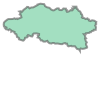

In [181]:
sf.loc[2].geometry

On reformate les code de départemetns pour qu'ils soient conformes (1 au lieu de 01)

In [182]:
for i in range(1,10):
    sf.code.replace({"0"+str(i) : str(i)}, inplace = True)
sf.code

0      1
1      2
2      3
3      4
4      5
      ..
91    91
92    92
93    93
94    94
95    95
Name: code, Length: 96, dtype: object

In [183]:
dep_map = sf.merge(dep_abs, left_on='code', right_on='Code du département', suffixes=('','_y'))
dep_map.head(20)

code                      nom  \
0     1                      Ain   
1     1                      Ain   
2     1                      Ain   
3     1                      Ain   
4     2                    Aisne   
5     2                    Aisne   
6     2                    Aisne   
7     2                    Aisne   
8     3                   Allier   
9     3                   Allier   
10    3                   Allier   
11    3                   Allier   
12    4  Alpes-de-Haute-Provence   
13    4  Alpes-de-Haute-Provence   
14    4  Alpes-de-Haute-Provence   
15    4  Alpes-de-Haute-Provence   
16    5             Hautes-Alpes   
17    5             Hautes-Alpes   
18    5             Hautes-Alpes   
19    5             Hautes-Alpes   

                                             geometry Code du département  \
0   POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...                   1   
1   POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...                   1   
2   POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...                   1   
3   POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...                   1   
4   POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...                   2   
5   POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...                   2   
6   POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...                   2   
7   POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...                   2   
8   POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...                   3   
9   POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...                   3   
10  POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...                   3   
11  POLYGON ((3.03207 46.79491, 3.04907 46.75808, ...                   3   
12  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...                   4   
13  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...                   4   
14  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...                   4   
15  POLYGON ((5.67604 44.19143, 5.69209 44.18648, ...                   4   
16  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...                   5   
17  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...                   5   
18  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...                   5   
19  POLYGON ((6.26057 45.12685, 6.29922 45.10855, ...                   5   

     Libellé du département  Abstentions_t1 % Abs/Ins_t1  Inscrits  \
0                       Ain           81507         19,6    415886   
1                       AIN           65996        16,76    393808   
2                       AIN           52040        13,96    372899   
3                       AIN           89002        26,31    338220   
4                     Aisne           80183        21,34    375752   
5                     AISNE           72928        19,39    376068   
6                     AISNE           61974        16,42    377475   
7                     AISNE           96157        26,21    366810   
8                    Allier           54275        21,41    253508   
9                    ALLIER           45266        17,66    256275   
10                   ALLIER           38012        14,65    259537   
11                   ALLIER           67066        26,19    256113   
12  Alpes-de-Haute-Provence           24323        19,22    126578   
13  ALPES DE HAUTE PROVENCE           21034        16,97    123933   
14  ALPES DE HAUTE PROVENCE           16143        13,57    118936   
15  ALPES DE HAUTE PROVENCE           26555        24,38    108943   
16             Hautes-Alpes           20821        18,94    109907   
17             HAUTES ALPES           18246        17,07    106865   
18             HAUTES ALPES           14428        14,01    102955   
19             HAUTES ALPES           23051        24,24     95100   

    Abstentions_t2 % Abs/Ins_t2  ...  F 40 à 59 ans F 60 à 74 ans  \
0            93130        22,39  ...         165280         80506   
1            67279 

In [184]:
#Déjà exécuté ne pas réexécuter 
dep_map.pop('code') 
dep_map.pop('nom') 
dep_map.head(2)

geometry Code du département  \
0  POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...                   1   
1  POLYGON ((4.78021 46.17668, 4.79458 46.21832, ...                   1   

  Libellé du département  Abstentions_t1 % Abs/Ins_t1  Inscrits  \
0                    Ain           81507         19,6    415886   
1                    AIN           65996        16,76    393808   

   Abstentions_t2 % Abs/Ins_t2  Année   Abs_nat_t1  ... F 40 à 59 ans  \
0           93130        22,39   2017  19,98088482  ...        165280   
1           67279        17,08   2012  18,62721494  ...         39692   

  F 60 à 74 ans F 75 ans et plus F Total  Nombre bureau de vote  \
0         80506            44451  632707                     50   
1         25710            21440  149316                     40   

  Revenu fiscal moyen      Trend_0       Trend_1      Trend_5     Trend_10  
0             3 596 €  3,006635254  -7,559631688  80,25610639  32,10567118  
1             1 763 €   3,17076177   8,038330959  5,458810329  90,09594535  

[2 rows x 46 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
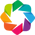

In [185]:
import geoviews as gv
gv.extension("bokeh")
from holoviews import dim, opts

On observe ensuite la carte interactive avec les départements colorés selon le niveau d'abstention.
Glisser la souris sur un département pour avoir les ifnormations

NB : Si la carte ne s'affiche pas, éditer le code en HTLM pour qu'elle apparaisse.

In [186]:
map_france = gv.Polygons(dep_map, vdims=[ 'Libellé du département','% Abs/Ins_t1', '% Abs/Ins_t2','Année'])
map_france.opts(width=600, height=600, toolbar='above', color = dim('% Abs/Ins_t1'), 
             colorbar=True, tools=['hover'], aspect='equal')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mlin

:Polygons   [Longitude,Latitude]   (Libellé du département,% Abs/Ins_t1,% Abs/Ins_t2,Année)

## PARTIE 3 : Modélisation : des régressions linéaires<a class="anchor" id="chapter3"></a>

In [20]:
df = pd.read_csv("dep_final_v3.csv", sep = ';')

In [21]:
# Pendant l'agrégation des données, on avait remplacé les département de Corse par des valeurs numériques, on va corriger cela
# On manipule la colonne code département pour pouvoir maintenant agréger des données relatives à la superficie 
# Des départements (et pouvoir faire un merge facile)
df["Code département"] = df["Code département"].astype(str)
df["Code département"].replace({"20.5":"2000"}, inplace = True)
df["Code département"].replace({"20.0":"3000"}, inplace = True)

In [22]:
df["Code département"] = df["Code département"].astype(float)
df["Code département"] = df["Code département"].astype(int)

In [23]:
df["Code département"] 

0      95
1      94
2      93
3      92
4      91
       ..
379     5
380     4
381     3
382     2
383     1
Name: Code département, Length: 384, dtype: int64

In [24]:
#Le dataset qui contient la colonne désirée
superficie = pd.read_excel("superficie.xls")
superficie.columns

Index(['NOM', 'NUMÉRO', 'REGION', 'CHEF LIEU', 'SUPERFICIE ', 'POPULATION',
       'DENSITE (habitants/km2)'],
      dtype='object')

In [25]:
superficie = superficie[["NUMÉRO","SUPERFICIE "]]

In [26]:
#le csv utilisé a une colonne d'index qui a été confondu pour une colonne
df = df.drop("Unnamed: 0",axis=1)

In [27]:
# Harmonisation des colonnes utilisées en clé de jointure
df["Code département"] = df["Code département"].astype(str)
superficie["NUMÉRO"] = superficie["NUMÉRO"].astype(str)

In [28]:
df["Code département"]

0      95
1      94
2      93
3      92
4      91
       ..
379     5
380     4
381     3
382     2
383     1
Name: Code département, Length: 384, dtype: object

In [29]:
# Rétablissement des bons numéros de département pour la Corse 
df["Code département"].replace({"2000":"2B"}, inplace = True)
df["Code département"].replace({"3000":"2A"}, inplace = True)


In [30]:
# Jointure finale 
df_final = pd.merge(df, superficie,how='left', left_on ="Code département",right_on ="NUMÉRO")

In [31]:
df = df_final

In [32]:
df = df.rename(columns={'SUPERFICIE ': 'superficie'})
#création de la densité de "population inscrite sur listes"
df["densite_pop"] = df["Inscrits"]/df["superficie"]

### 3.1 Ajout des catégories en pourcentage pour le besoin de modèles<a class="anchor" id="section_3_1"></a>

In [33]:
#On crée de nouvelles catégories, en pourcentage, pour avoir des variables explicatives, et non juste des 
#valeur démographiques en valeur absolue 

#On remplace les valeurs Nans par 0 (en fait cela concerne les données de 2002, qu'on écartera de la modélisation)
df = df.fillna(0)

df["Hommes actifs ayant un emplois"] = df["Hommes actifs ayant un emplois"].astype(int)
df["Hommes chômeurs"] = df["Hommes chômeurs"].astype(int)
df["Femmes actifs ayant un emploi"] = df["Femmes actifs ayant un emploi"].astype(int)
df["Femmes chomeurs"] = df["Femmes chomeurs"].astype(int)
df["pop active ayant un emploi"] = df["pop active ayant un emploi"].astype(int)
df["pop chômeurs"] = df["pop chômeurs"].astype(int)

df["% chomeurs"] = df["pop chômeurs"]/df["Ensemble Total"]
df["% chomeurs_M"] = df["Hommes chômeurs"]/df["H Total"]
df["% chomeurs_F"] = df["Femmes chomeurs"]/df["F Total"]
df["% emploi_M"] = df["Hommes actifs ayant un emplois"]/df["H Total"]
df["% emploi_F"] = df["Femmes actifs ayant un emploi"]/df["F Total"]
df["% emploi"] = df["pop active ayant un emploi"]/df["Ensemble Total"]

In [34]:
df["% Ensemble 0 à 19 ans"] = df["Ensemble 0 à 19 ans"]/df["Ensemble Total"]
df["% Ensemble 20 à 39 ans"] = df["Ensemble 20 à 39 ans"]/df["Ensemble Total"]
df["% Ensemble 40 à 59 ans"] = df["Ensemble 40 à 59 ans"]/df["Ensemble Total"]
df["% Ensemble 60 à 74 ans"] = df["Ensemble 60 à 74 ans"]/df["Ensemble Total"]
df["% Ensemble 75 ans et plus"] = df["Ensemble 75 ans et plus"]/df["Ensemble Total"]
df["%H 0 à 19 ans"]= df["H 0 à 19 ans"]/df["H Total"]
df["%H 20 à 39 ans"]= df["H 20 à 39 ans"]/df["H Total"]
df["%H 40 à 59 ans"]= df["H 40 à 59 ans"]/df["H Total"]
df["%H 60 à 74 ans"]= df["H 60 à 74 ans"]/df["H Total"]
df["%H 75 ans et plus"]= df["H 75 ans et plus"]/df["H Total"]
df["%H Total"]= df["H Total"]/df["Ensemble Total"]
df["%F 0 à 19 ans"]= df["F 0 à 19 ans"]/df["F Total"]
df["%F 20 à 39 ans"]= df["F 20 à 39 ans"]/df["F Total"]
df["%F 40 à 59 ans"]= df["F 40 à 59 ans"]/df["F Total"]
df["%F 60 à 74 ans"]= df["F 60 à 74 ans"]/df["F Total"]
df["F 75 ans et plus"] = df["F 75 ans et plus"]/df["F Total"]
df["%F Total"] = df["F Total"]/df["Ensemble Total"]

In [35]:
df.to_excel("df_mise.xls")

In [36]:
#Filtrage datasets par élection 
df_2017 = df[df.Année == 2017]
df_2012 = df[df.Année == 2012]
df_2007 = df[df.Année == 2007]
df_2002 = df[df.Année == 2002]

In [37]:
df.columns

Index(['Code département', 'Libellé du département_x', 'Abstentions_t1',
       '% Abs/Ins_t1', 'Inscrits', 'Abstentions_t2', '% Abs/Ins_t2', 'Année',
       'Abs_nat_t1', 'Abs_nat_t2', 'Abs_nat', '% Abs/Ins', 'indice_tendance',
       'tendance_précédante', 'ecart_a_la_tendance', 'Ensemble 0 à 19 ans',
       'Ensemble 20 à 39 ans', 'Ensemble 40 à 59 ans', 'Ensemble 60 à 74 ans',
       'Ensemble 75 ans et plus', 'Ensemble Total', 'H 0 à 19 ans',
       'H 20 à 39 ans', 'H 40 à 59 ans', 'H 60 à 74 ans', 'H 75 ans et plus',
       'H Total', 'F 0 à 19 ans', 'F 20 à 39 ans', 'F 40 à 59 ans',
       'F 60 à 74 ans', 'F 75 ans et plus', 'F Total',
       'Hommes actifs ayant un emplois', 'Hommes chômeurs',
       'Femmes actifs ayant un emploi', 'Femmes chomeurs',
       'pop active ayant un emploi', 'pop chômeurs', 'Nombre bureau de vote',
       'Trend pouvoir achat 0', 'Trend pouvoir achat 1',
       'Trend pouvoir achat 5', 'Trend pouvoir achat 10',
       'Revenu fiscal moyen', 'NUMÉ

In [ ]:
#Objectif : avoir une bonne idée des corrélations entre les variables, et des potentiels régresseurs parmis nos
#Nombreuses variables explicatives

In [38]:
import seaborn as sns

In [39]:
#Le revenu fiscal moyen est écrit 2 312 € dans l'excel, on doit corriger cela 
df["Revenu fiscal moyen"]

0      2 312 €
1      2 490 €
2      1 786 €
3      3 503 €
4      2 562 €
        ...   
379          0
380          0
381          0
382          0
383          0
Name: Revenu fiscal moyen, Length: 384, dtype: object

In [40]:
#Correction d'un problème de format des données : 
df["Revenu fiscal moyen"] = df["Revenu fiscal moyen"].str.replace(pat = " €", repl = "")

In [41]:
#Correction d'un problème de format des données : 
df["Revenu fiscal moyen"] = df["Revenu fiscal moyen"].astype(str)  

In [42]:
# Suprression de l'espace des milliers
df["Revenu fiscal moyen"]=df["Revenu fiscal moyen"].str.replace('\xa0',"") 

In [43]:
df["Revenu fiscal moyen"] = df["Revenu fiscal moyen"].str.replace('nan',"0") 

In [44]:
df["Revenu fiscal moyen"] = df["Revenu fiscal moyen"].astype(int)  

In [45]:
df["Revenu fiscal moyen"]

0      2312
1      2490
2      1786
3      3503
4      2562
       ... 
379       0
380       0
381       0
382       0
383       0
Name: Revenu fiscal moyen, Length: 384, dtype: int64

In [46]:
# On réalise de la visualisation sur quelques sous ensembles du dataset sans prendre 2002 où il manque des données
df_all = df.drop(df[df["Année"] == 2002].index)
variable = df_all[["% Abs/Ins_t1","% Abs/Ins_t2","indice_tendance", '% chomeurs','Nombre bureau de vote','Revenu fiscal moyen']]

In [47]:
variable.dtypes

% Abs/Ins_t1             float64
% Abs/Ins_t2             float64
indice_tendance          float64
% chomeurs               float64
Nombre bureau de vote      int64
Revenu fiscal moyen        int64
dtype: object

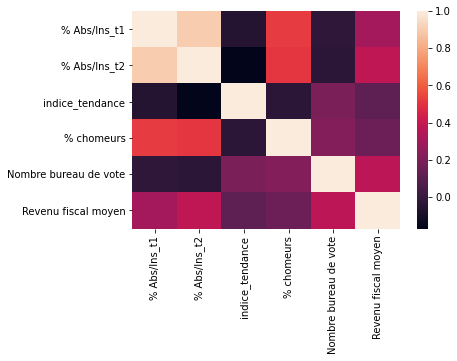

In [48]:
corr = variable.corr()
sns.heatmap(corr)

Très forte corrélation entre l'abstention aux deux tours comme on peut s'y attendre
Malheurseuement l'indice tendance qui examine la tendance de vote du département semble peu corrélée.
Le chômage le revenu fiscal ne sont que peu corrélés à l'abstention.
En revanche il y a bien une corrélation entre les chiffres du chômage et l'abstention

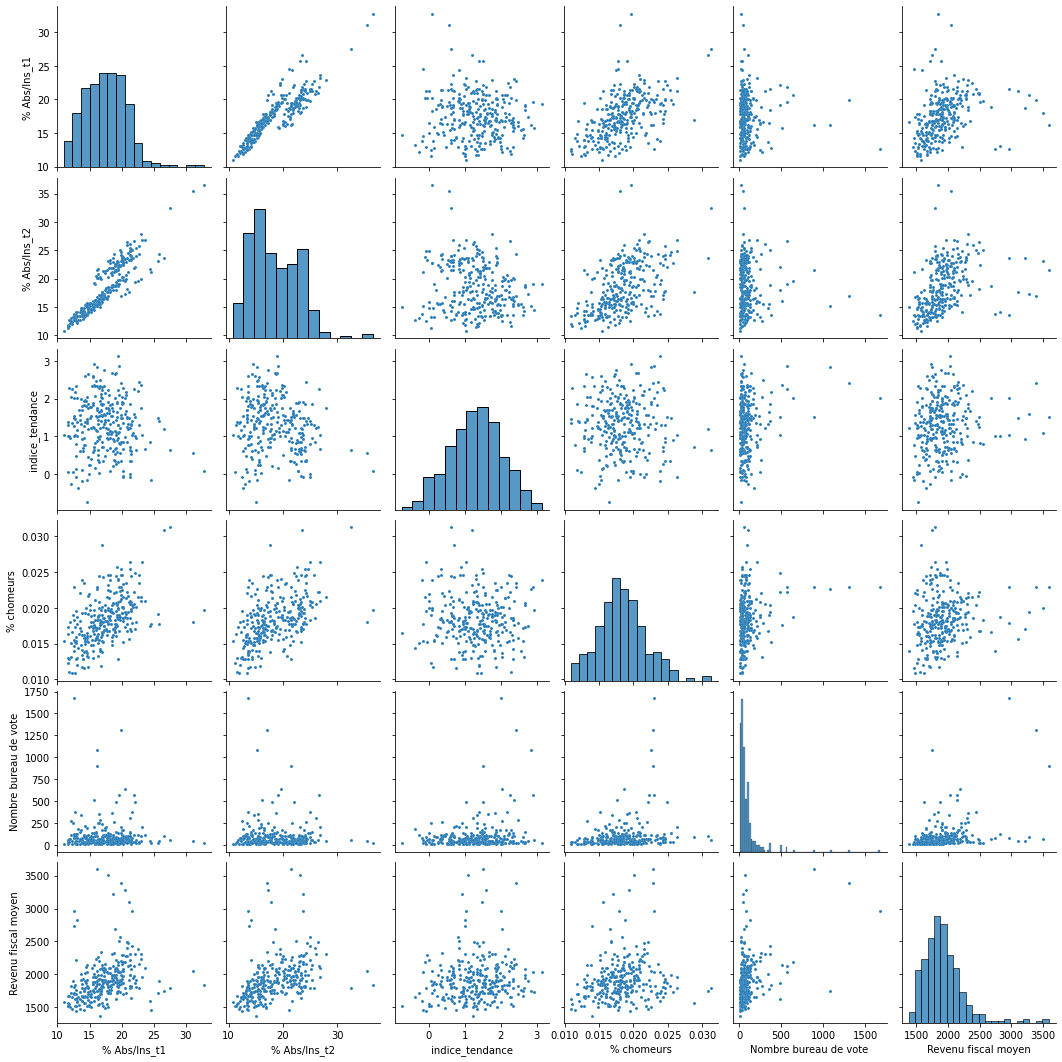

In [49]:
# On prend une vue d'ensemble sur les variables explicatives choisies
sns.pairplot(variable, kind = 'scatter', diag_kind = 'hist', plot_kws=dict(marker=".", linewidth=0.1))

On voit ici les tendandaces qui se dégagent, ainsi que les nuages de points sans grand rapport d'une variable avec une autre.

(Notamment l'indicie tendance qui ne parait pas pertinent pour déduire quoique ce soit)

In [50]:
# Notre indicateur indice_tendance créé pour l'occasion semble peu pertinent dans cette représentation graphique
# regardons plutôt l'écart à la tendance, échelle entre -5 et 5 du vote selon son orientation politique
variable2 = df_all[["% Abs/Ins_t1",'ecart_a_la_tendance']]

In [51]:
variable2

% Abs/Ins_t1  ecart_a_la_tendance
0           22.94              -1.2550
1           20.89              -1.7571
2           27.51              -2.3737
3           17.91              -1.9247
4           19.80              -2.1986
..            ...                  ...
283         14.01              -5.3101
284         13.57              -5.3853
285         14.65              -6.7574
286         16.42              -5.9833
287         13.96              -5.3969

[288 rows x 2 columns]

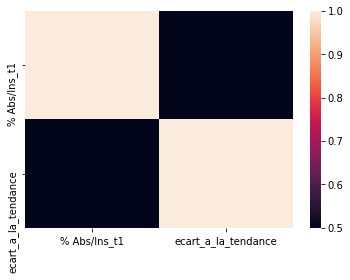

In [52]:
corr =variable2.corr()
sns.heatmap(corr)

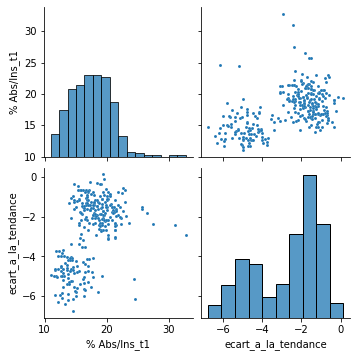

In [53]:
sns.pairplot(variable2, kind = 'scatter', diag_kind = 'hist', plot_kws=dict(marker=".", linewidth=0.1))

Ici une tendance beaucoup plus marquée, les départements où le vote s'exprime à gauche connaissent une abstention plus faible que les départements où un vote très marqué à droite s'exprime. 

In [54]:
df_all.columns

Index(['Code département', 'Libellé du département_x', 'Abstentions_t1',
       '% Abs/Ins_t1', 'Inscrits', 'Abstentions_t2', '% Abs/Ins_t2', 'Année',
       'Abs_nat_t1', 'Abs_nat_t2', 'Abs_nat', '% Abs/Ins', 'indice_tendance',
       'tendance_précédante', 'ecart_a_la_tendance', 'Ensemble 0 à 19 ans',
       'Ensemble 20 à 39 ans', 'Ensemble 40 à 59 ans', 'Ensemble 60 à 74 ans',
       'Ensemble 75 ans et plus', 'Ensemble Total', 'H 0 à 19 ans',
       'H 20 à 39 ans', 'H 40 à 59 ans', 'H 60 à 74 ans', 'H 75 ans et plus',
       'H Total', 'F 0 à 19 ans', 'F 20 à 39 ans', 'F 40 à 59 ans',
       'F 60 à 74 ans', 'F 75 ans et plus', 'F Total',
       'Hommes actifs ayant un emplois', 'Hommes chômeurs',
       'Femmes actifs ayant un emploi', 'Femmes chomeurs',
       'pop active ayant un emploi', 'pop chômeurs', 'Nombre bureau de vote',
       'Trend pouvoir achat 0', 'Trend pouvoir achat 1',
       'Trend pouvoir achat 5', 'Trend pouvoir achat 10',
       'Revenu fiscal moyen', 'NUMÉ

In [55]:
#Regardons un autre sous-ensemble de données : 
ss_ensemble_demo = df_all[["% Abs/Ins_t1","Année","% emploi_F","% Ensemble 75 ans et plus","%H 0 à 19 ans","%F 20 à 39 ans"]]

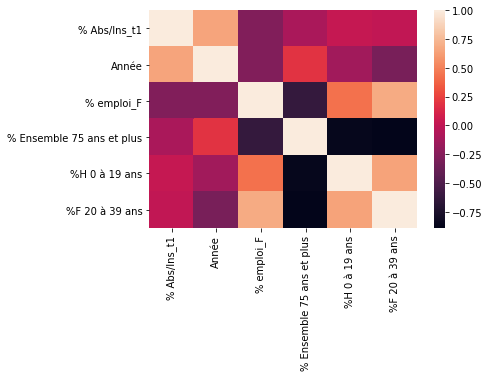

In [56]:
corr = ss_ensemble_demo.corr()
sns.heatmap(corr)

Si on retrouve les corrélations attendus négatives entre les différents groupes démographiques de la population d'un d"partement, le découpage de ces sous-ensemble ne joue pas clairement sur l'abstention.

Il est par exemple difficile de supposer qu'un département plutôt jeune est plus ou moins abstentionniste. 

Cela se comprend aussi par les faibles écarts démographiques dans la majorité des départements. Les conséquences de légers décalages ne peuvent donc se lire sur une heatmap. 

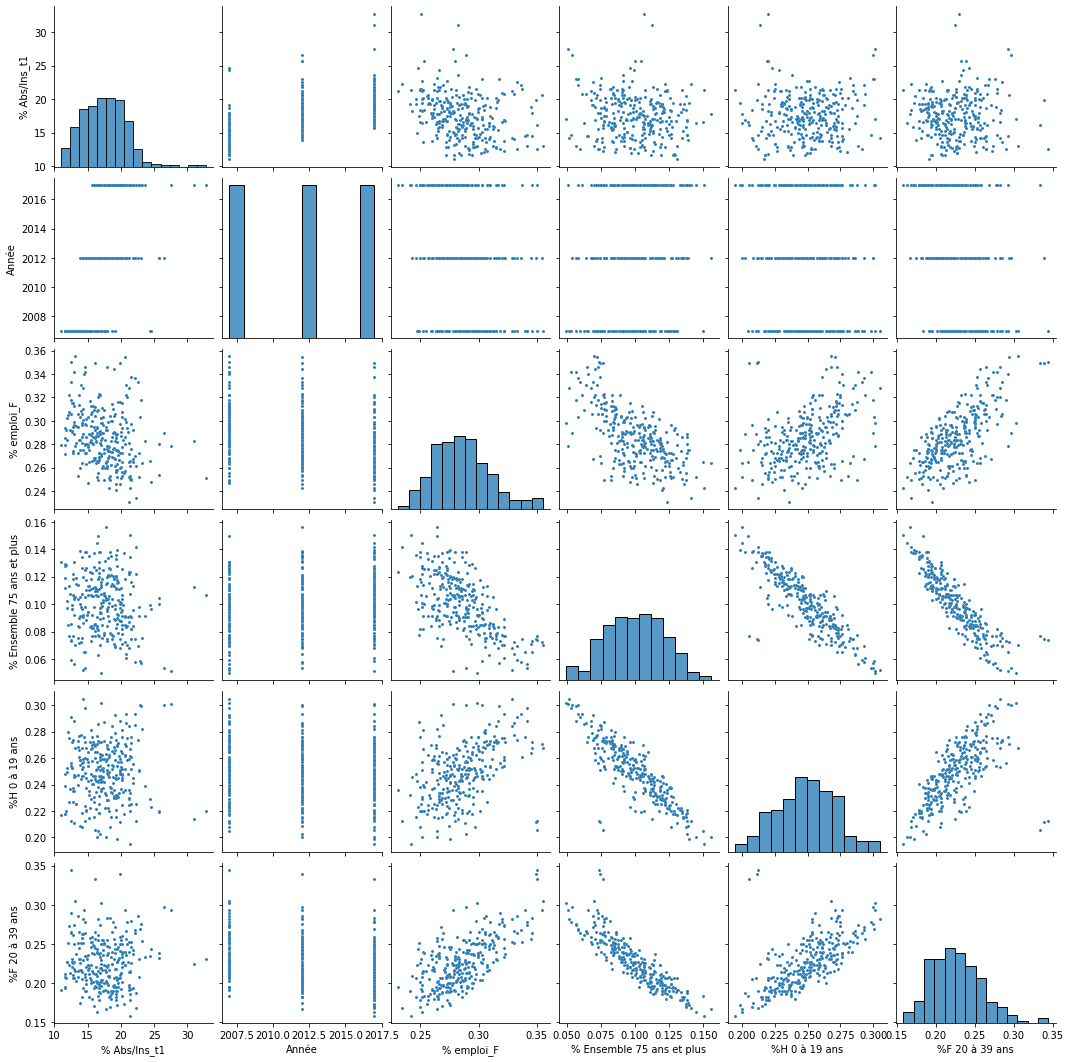

In [57]:
sns.pairplot(ss_ensemble_demo, kind = 'scatter', diag_kind = 'hist', plot_kws=dict(marker=".", linewidth=0.1))

On voit ici les nuages de points entre les différents ensemble démographiques et l'abstention au t1, qui ne se prêtent à aucune tentative d'interprétation à l'oeil.

Les histogrammes confirment que la majorité des départements présentent des populations bien avec des proportions démographiques similaires, il faut donc une analyse plus poussée pour voir l'effet sur l'abstention d'un département plus jeune que la tendance ou plus vieux.

On remarque aussi une tendance à l'abstention qui augmente à chaque quinquennat, bien que les données restent très étalées.

In [58]:
#standardisation des données 
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
print(scaler.fit(variable))

StandardScaler()


In [61]:
print(scaler.mean_)

[1.75152083e+01 1.84530208e+01 1.30729792e+00 1.83701219e-02
 1.00402778e+02 1.92462153e+03]


In [62]:
var = scaler.transform(variable)

In [63]:
var

array([[ 1.63512776,  2.19766023,  0.61174617,  0.92747862, -0.2983672 ,
         1.15875674],
       [ 1.01722165,  1.83935784, -0.09000455,  1.10915241, -0.25692959,
         1.69120424],
       [ 3.01260626,  3.24482785, -0.95178406,  3.79642911, -0.25692959,
        -0.41465554],
       ...,
       [-0.86362426, -0.80745659, -2.8856866 , -0.56927758, -0.43451933,
        -1.18939657],
       [-0.33011508, -0.5878519 , -1.80378015,  0.47773665, -0.36348343,
        -1.13555356],
       [-1.07160241, -0.95308917, -0.9842091 , -1.64399592, -0.48187659,
         0.02506234]])

In [64]:
variable

% Abs/Ins_t1  % Abs/Ins_t2  indice_tendance  % chomeurs  \
0           22.94         27.96           1.7450    0.021518   
1           20.89         26.41           1.2429    0.022135   
2           27.51         32.49           0.6263    0.031257   
3           17.91         23.06           1.0753    0.020027   
4           19.80         25.08           0.8014    0.018332   
..            ...           ...              ...         ...   
283         14.01         12.95           0.6899    0.012824   
284         13.57         12.73           0.6147    0.018114   
285         14.65         14.96          -0.7574    0.016438   
286         16.42         15.91           0.0167    0.019992   
287         13.96         14.33           0.6031    0.012790   

     Nombre bureau de vote  Revenu fiscal moyen  
0                       50                 2312  
1                       57                 2490  
2                       57                 1786  
3                       69                 3503  
4                       26                 2562  
..                     ...                  ...  
283                     29                 1652  
284                     15                 1626  
285                     27                 1527  
286                     39                 1545  
287                     19                 1933  

[288 rows x 6 columns]

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
#On veut expliquer l'abstention au t1 
y = variable["% Abs/Ins_t1"]
x = variable.loc[:, variable.columns != '% Abs/Ins_t1']

In [67]:
reg = LinearRegression().fit(x, y)

In [68]:
#Bon score de prédiction (on s'y attendait, on explique l'abstention au t1 avec notamment l'abstention au t2)
reg.score(x, y)

0.8273003606895148

In [69]:
reg.coef_

array([ 6.90520539e-01,  4.84447471e-01,  7.44964128e+01, -2.30728291e-04,
       -5.55606671e-04])

In [70]:
reg.intercept_

3.8636914123633215

In [71]:
# si on enlève la varaible très explicative..
y = variable["% Abs/Ins_t1"]
x = variable.drop(["% Abs/Ins_t1","% Abs/Ins_t2"],axis = 1)

In [72]:
reg = LinearRegression().fit(x, y)

In [73]:
#sans l'abstention au t2, c'est une autre histoire..
reg.score(x, y)

0.38380621372540435

### 3.3 Régression lasso<a class="anchor" id="section_3_3"></a>

Réalisons plusieurs régressions pour tenter de bien sélectionner nos régresseurs et d'améliorer la prédiction de l'abstention au t1

### Régression préliminaire 

In [74]:
#Filtrage datasets par élection : constitution de données d'entrainement et de test
df_2017 = df[df.Année == 2017]
df_2012 = df[df.Année == 2012]
df_2007 = df[df.Année == 2007]
df_2002 = df[df.Année == 2002]

In [75]:
#On garde les 3 dernières élections pour lesquelles nous avons des données complètes
df_all = df.drop(df[df["Année"] == 2002].index)

In [76]:
df_all[df_all["Année"]==2002]

Empty DataFrame
Columns: [Code département, Libellé du département_x, Abstentions_t1, % Abs/Ins_t1, Inscrits, Abstentions_t2, % Abs/Ins_t2, Année, Abs_nat_t1, Abs_nat_t2, Abs_nat, % Abs/Ins, indice_tendance, tendance_précédante, ecart_a_la_tendance, Ensemble 0 à 19 ans, Ensemble 20 à 39 ans, Ensemble 40 à 59 ans, Ensemble 60 à 74 ans, Ensemble 75 ans et plus, Ensemble Total, H 0 à 19 ans, H 20 à 39 ans, H 40 à 59 ans, H 60 à 74 ans, H 75 ans et plus, H Total, F 0 à 19 ans, F 20 à 39 ans, F 40 à 59 ans, F 60 à 74 ans, F 75 ans et plus, F Total, Hommes actifs ayant un emplois, Hommes chômeurs, Femmes actifs ayant un emploi, Femmes chomeurs, pop active ayant un emploi, pop chômeurs, Nombre bureau de vote, Trend pouvoir achat 0, Trend pouvoir achat 1, Trend pouvoir achat 5, Trend pouvoir achat 10, Revenu fiscal moyen, NUMÉRO, superficie, densite_pop, % chomeurs, % chomeurs_M, % chomeurs_F, % emploi_M, % emploi_F, % emploi, % Ensemble 0 à 19 ans, % Ensemble 20 à 39 ans, % Ensemble 40 à 59 ans, % Ensemble 60 à 74 ans, % Ensemble 75 ans et plus, %H 0 à 19 ans, %H 20 à 39 ans, %H 40 à 59 ans, %H 60 à 74 ans, %H 75 ans et plus, %H Total, %F 0 à 19 ans, %F 20 à 39 ans, %F 40 à 59 ans, %F 60 à 74 ans, %F Total]
Index: []

[0 rows x 70 columns]

In [77]:
df_all.columns 
#Examinons les variables explicatives potentielles 

Index(['Code département', 'Libellé du département_x', 'Abstentions_t1',
       '% Abs/Ins_t1', 'Inscrits', 'Abstentions_t2', '% Abs/Ins_t2', 'Année',
       'Abs_nat_t1', 'Abs_nat_t2', 'Abs_nat', '% Abs/Ins', 'indice_tendance',
       'tendance_précédante', 'ecart_a_la_tendance', 'Ensemble 0 à 19 ans',
       'Ensemble 20 à 39 ans', 'Ensemble 40 à 59 ans', 'Ensemble 60 à 74 ans',
       'Ensemble 75 ans et plus', 'Ensemble Total', 'H 0 à 19 ans',
       'H 20 à 39 ans', 'H 40 à 59 ans', 'H 60 à 74 ans', 'H 75 ans et plus',
       'H Total', 'F 0 à 19 ans', 'F 20 à 39 ans', 'F 40 à 59 ans',
       'F 60 à 74 ans', 'F 75 ans et plus', 'F Total',
       'Hommes actifs ayant un emplois', 'Hommes chômeurs',
       'Femmes actifs ayant un emploi', 'Femmes chomeurs',
       'pop active ayant un emploi', 'pop chômeurs', 'Nombre bureau de vote',
       'Trend pouvoir achat 0', 'Trend pouvoir achat 1',
       'Trend pouvoir achat 5', 'Trend pouvoir achat 10',
       'Revenu fiscal moyen', 'NUMÉ

In [78]:
#proposition de deux modèles pour la régression avec plus ou moins de variables explicatives
df_model = df_all[["% Abs/Ins_t1","Année","ecart_a_la_tendance","tendance_précédante","Revenu fiscal moyen","densite_pop","% chomeurs_M","% emploi_M","% Ensemble 0 à 19 ans","% Ensemble 20 à 39 ans","% Ensemble 40 à 59 ans","% Ensemble 60 à 74 ans","% Ensemble 75 ans et plus","superficie","Inscrits","% emploi_F","% chomeurs_F","%H 0 à 19 ans","%H 20 à 39 ans","%H 40 à 59 ans","%H 60 à 74 ans","% Ensemble 75 ans et plus"]]
df_model_2 = df_all[["% Abs/Ins_t1","Année","ecart_a_la_tendance","tendance_précédante","Revenu fiscal moyen","densite_pop","% chomeurs_M","% emploi_M","% Ensemble 0 à 19 ans","% Ensemble 20 à 39 ans","% Ensemble 40 à 59 ans","% Ensemble 60 à 74 ans","% Ensemble 75 ans et plus","superficie","Inscrits"]]

In [79]:
df_model.dtypes
#On va pouvoir faire des opérations correctement 

% Abs/Ins_t1                 float64
Année                          int64
ecart_a_la_tendance          float64
tendance_précédante            int64
Revenu fiscal moyen            int64
densite_pop                  float64
% chomeurs_M                 float64
% emploi_M                   float64
% Ensemble 0 à 19 ans        float64
% Ensemble 20 à 39 ans       float64
% Ensemble 40 à 59 ans       float64
% Ensemble 60 à 74 ans       float64
% Ensemble 75 ans et plus    float64
superficie                   float64
Inscrits                       int64
% emploi_F                   float64
% chomeurs_F                 float64
%H 0 à 19 ans                float64
%H 20 à 39 ans               float64
%H 40 à 59 ans               float64
%H 60 à 74 ans               float64
% Ensemble 75 ans et plus    float64
dtype: object

In [80]:
#Séparation du dataset en train et test : ici sur df_model_2 (sur df_model : le lasso ne converge pas)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_model_2,train_size = 200,random_state=1212)

In [81]:
print(df_train.shape) 
print(df_test.shape)

(200, 15)
(88, 15)


In [82]:
# On choisit la variable à expliquer 
y = df_train["% Abs/Ins_t1"]
x = df_train.drop(["% Abs/Ins_t1"],axis = 1)

In [83]:
reg = LinearRegression().fit(x, y)

In [84]:
reg.score(x, y)

0.6794971970764159

In [85]:
reg.coef_

array([ 4.17963633e-01, -3.19039357e-01, -1.15755363e+00, -2.34120269e-03,
       -4.99617962e-04, -1.27042934e+01, -5.91056800e+01, -7.21788730e+01,
        6.76629480e+01,  9.21300841e+01,  2.11077316e+01, -1.08721891e+02,
       -3.07480580e-04,  2.26093488e-07])

In [86]:
#On utilise la régression pour prédire 

x_test =  df_test.drop(["% Abs/Ins_t1"],axis = 1)
y_test =  df_test["% Abs/Ins_t1"]
prediction = reg.predict(x_test)

In [87]:
prediction

array([16.05344718, 17.05159179, 13.90856839, 18.06029258, 20.69243992,
       15.14231905, 23.16787591, 18.99504471, 18.63330189, 13.80492592,
       20.51336118, 14.97642688, 15.24247417, 13.52429554, 20.07991525,
       13.00602589, 17.76832071, 14.80144067, 13.94772286, 18.79905445,
       14.23710591, 14.41511691, 16.91940189, 14.63360007, 19.60035324,
       18.05548138, 18.82375725, 18.72208889, 15.34605375, 18.47736335,
       16.24398232, 17.3635537 , 19.72086157, 19.9046854 , 17.8780398 ,
       19.69403664, 14.26384508, 23.77367492, 19.48292632, 15.57189086,
       13.01444344, 15.11644473, 21.84986924, 15.47401835, 16.56225555,
       18.6752529 , 18.57876501, 12.80876252, 16.82378825, 22.07978268,
       13.29187321, 23.00038416, 20.14499299, 20.59748431, 17.06394754,
       14.7350457 , 16.76756149, 20.32573792, 17.80267622, 18.80666274,
       14.55818513, 18.93949931, 18.83208705, 19.21500425, 17.81610255,
       18.66398033, 21.69328025, 16.62148318, 13.9108169 , 21.37

In [88]:
comparaison = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

In [89]:
#On regarde le résultat 
comparaison


Actual  Predicted
196   12.92  16.053447
177   16.84  17.051592
260   15.57  13.908568
181   16.51  18.060293
86    19.11  20.692440
..      ...        ...
87    18.22  21.487822
98    26.54  21.883314
240   12.78  14.398500
9     20.24  19.162732
287   13.96  13.517922

[88 rows x 2 columns]

In [90]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 1.7811681337756051
Mean Squared Error: 5.122884321100994
Root Mean Squared Error: 2.263378961000785


Pour des valeurs d'abstention entre 10 et 27%, l'erreur semble plutot basse et la prédiction plutot performante

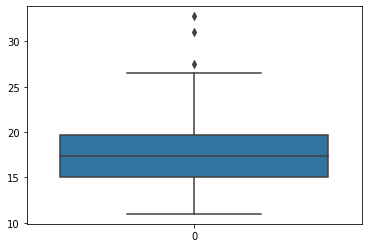

In [91]:
sns.boxplot(data = df_all["% Abs/Ins_t1"])

En fait, les valeurs sont comprises à 50% entre 15 et 20%, l'erreur moyenne est donc beaucoup moins satisfaisante dans ce contexte

### 3.3 Lasso<a class="anchor" id="section_3_3"></a> 

In [92]:
#On commence par standardiser les données
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
z_train =sc.fit_transform(df_train)

In [93]:
np.mean(z_train,axis=0)

array([-8.88178420e-18,  1.33226763e-17, -5.32907052e-17,  4.88498131e-17,
        9.32587341e-17,  5.77315973e-17, -2.81996648e-16, -2.89546165e-15,
        5.95079541e-16, -5.50670620e-16, -2.59126054e-15, -8.70414851e-16,
        5.95079541e-16, -2.22044605e-16, -6.66133815e-17])

In [94]:
np.var(z_train, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [95]:
#On réalise le premier lasso de base 
from sklearn.linear_model import Lasso
lasso1 = Lasso(fit_intercept=False,normalize=False)


In [96]:
lasso1.alpha

1.0

In [97]:
#On sépare bien les données entre la variable à expliquer et les variables explicatives 
y_train = z_train[:,:1]
x_train = z_train[:,1: ]

In [98]:
x_train = z_train[:,1: ]
x_train

array([[-1.30487651, -0.98929332,  1.52752523, ..., -0.48746503,
         0.20790643,  0.72408195],
       [-0.06213698,  0.90109579, -0.65465367, ...,  0.8872173 ,
         0.63067843, -0.01936658],
       [ 1.18060256, -0.22853146, -0.65465367, ...,  0.25624099,
        -0.57288871, -0.99405794],
       ...,
       [ 1.18060256,  0.59195205, -0.65465367, ...,  0.34745034,
         0.55178275,  0.69684262],
       [-0.06213698,  0.53682438, -0.65465367, ..., -0.00328078,
         0.22205324, -0.13312132],
       [-0.06213698,  0.36690865, -0.65465367, ..., -0.01774975,
         0.26775832, -0.94845083]])

In [99]:
lasso1.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Lasso(fit_intercept=False, normalize=False)

In [100]:

lasso1.coef_


array([ 0.,  0., -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
        0.])

Pour une valeur alpha de 1, toutes nos variables explicatives ont un poids de 0, essayons donc plus de alpha

In [101]:
alpha_list = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])

In [102]:
from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _ = lasso_path(x_train,y_train,alphas=alpha_list)

In [103]:
print(coefs_lasso.shape) 

(1, 14, 10)


In [104]:
coefs_lasso[0,1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.02590684, -0.14825989])

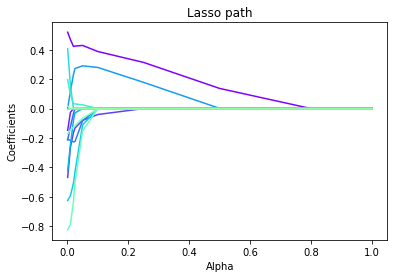

In [105]:
# On trace les variables explicatives de coefficient non nul en fonction de la valeur de alpha

import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,25))


for i in range(coefs_lasso.shape[1]):
    plt.plot(alpha_for_path,coefs_lasso[0,i,:],c=couleurs[i])
       
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

In [106]:
#Essai avec une autre liste d'alphas
alpha_list = np.linspace(0.001,1,40)

In [107]:
alpha_for_path, coefs_lasso,d,n= lasso_path(x_train,y_train,alphas=alpha_list ,return_n_iter= True)

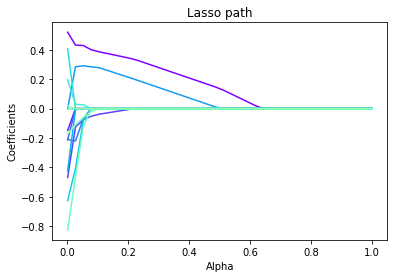

In [108]:
#Selon le modèle choisi plus haut, prendre une alpha list comme celle-ci modifie sensiblement le graphique
#(car le plupart des variables obtiennent un coefficient positif proche de 0)

for i in range(coefs_lasso.shape[1]):
    plt.plot(alpha_for_path,coefs_lasso[0,i,:],c=couleurs[i])
       
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

In [109]:
#Essayons maintenant de déterminer quelles sont les variables explicatives "non nulles"
non_nuls =np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso[0],axis=0)
non_nuls

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  5,  8,  9, 13])

In [110]:
pd.DataFrame({'alpha':alpha_for_path,'coeffs non nuls':non_nuls})

alpha  coeffs non nuls
0   1.000000                0
1   0.974385                0
2   0.948769                0
3   0.923154                0
4   0.897538                0
5   0.871923                0
6   0.846308                0
7   0.820692                0
8   0.795077                0
9   0.769462                0
10  0.743846                0
11  0.718231                0
12  0.692615                0
13  0.667000                0
14  0.641385                0
15  0.615769                1
16  0.590154                1
17  0.564538                1
18  0.538923                1
19  0.513308                1
20  0.487692                2
21  0.462077                2
22  0.436462                2
23  0.410846                2
24  0.385231                2
25  0.359615                2
26  0.334000                2
27  0.308385                2
28  0.282769                2
29  0.257154                2
30  0.231538                2
31  0.205923                3
32  0.180308                3
33  0.154692                3
34  0.129077                3
35  0.103462                3
36  0.077846                5
37  0.052231                8
38  0.026615                9
39  0.001000               13

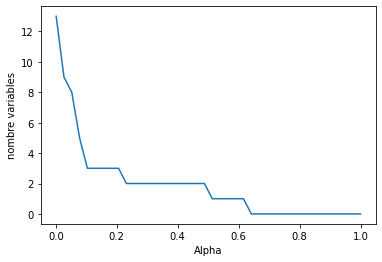

In [111]:
#Traçons plus joliment le nombre de variables explicatives activées par seuil de alpha
plt.plot(alpha_for_path,non_nuls)
plt.xlabel('Alpha')
plt.ylabel('nombre variables')
plt.show()

In [112]:
#On prend 5 variables explicatives
coefs_choisir = coefs_lasso[0,:,36]

In [113]:
pd.DataFrame({'colonnes':df_train.columns[1:],'coeffs' : coefs_choisir})

colonnes    coeffs
0                       Année  0.400587
1         ecart_a_la_tendance  0.000000
2         tendance_précédante -0.052802
3         Revenu fiscal moyen  0.000000
4                 densite_pop  0.000000
5                % chomeurs_M  0.284111
6                  % emploi_M  0.000000
7       % Ensemble 0 à 19 ans  0.000000
8      % Ensemble 20 à 39 ans  0.000000
9      % Ensemble 40 à 59 ans  0.000000
10     % Ensemble 60 à 74 ans  0.000000
11  % Ensemble 75 ans et plus -0.009036
12                 superficie -0.022064
13                   Inscrits  0.000000

On peut donc choisir d'effectuer une régression en utilisant ces variables explicatives non nulles, toutefois les p values associées ne sont pas satisfaisantes, on préfère utiliser une cross validation pour trouver les bonnes variables.


In [114]:
#Le lasso CV va permettre de trouver le bon niveau pour minimiser l'erreur de prédiction 
from sklearn.linear_model import LassoCV

lcv = LassoCV(alphas=alpha_list,normalize=False,fit_intercept=False,random_state=0,cv=5)
lcv.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LassoCV(alphas=array([0.001     , 0.02661538, 0.05223077, 0.07784615, 0.10346154,
       0.12907692, 0.15469231, 0.18030769, 0.20592308, 0.23153846,
       0.25715385, 0.28276923, 0.30838462, 0.334     , 0.35961538,
       0.38523077, 0.41084615, 0.43646154, 0.46207692, 0.48769231,
       0.51330769, 0.53892308, 0.56453846, 0.59015385, 0.61576923,
       0.64138462, 0.667     , 0.69261538, 0.71823077, 0.74384615,
       0.76946154, 0.79507692, 0.82069231, 0.84630769, 0.87192308,
       0.89753846, 0.92315385, 0.94876923, 0.97438462, 1.        ]),
        cv=5, fit_intercept=False, normalize=False, random_state=0)

In [115]:
lcv.alphas_

array([1.        , 0.97438462, 0.94876923, 0.92315385, 0.89753846,
       0.87192308, 0.84630769, 0.82069231, 0.79507692, 0.76946154,
       0.74384615, 0.71823077, 0.69261538, 0.667     , 0.64138462,
       0.61576923, 0.59015385, 0.56453846, 0.53892308, 0.51330769,
       0.48769231, 0.46207692, 0.43646154, 0.41084615, 0.38523077,
       0.35961538, 0.334     , 0.30838462, 0.28276923, 0.25715385,
       0.23153846, 0.20592308, 0.18030769, 0.15469231, 0.12907692,
       0.10346154, 0.07784615, 0.05223077, 0.02661538, 0.001     ])

In [116]:
lcv.mse_path_

array([[1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.8154756 ],
       [1.62278155, 0.93541816, 0.81671904, 0.80960564, 0.79546584],
       [1.62278155, 0.93541816, 0.

In [117]:
avg_mse = np.mean(lcv.mse_path_,axis=1)
pd.DataFrame({'alpha':lcv.alphas_,'MSE':avg_mse}) 

alpha       MSE
0   1.000000  1.000000
1   0.974385  1.000000
2   0.948769  1.000000
3   0.923154  1.000000
4   0.897538  1.000000
5   0.871923  1.000000
6   0.846308  1.000000
7   0.820692  1.000000
8   0.795077  1.000000
9   0.769462  1.000000
10  0.743846  1.000000
11  0.718231  1.000000
12  0.692615  1.000000
13  0.667000  0.995998
14  0.641385  0.989780
15  0.615769  0.979435
16  0.590154  0.950936
17  0.564538  0.921165
18  0.538923  0.892747
19  0.513308  0.865683
20  0.487692  0.838802
21  0.462077  0.810214
22  0.436462  0.778414
23  0.410846  0.746786
24  0.385231  0.717055
25  0.359615  0.689221
26  0.334000  0.663285
27  0.308385  0.639364
28  0.282769  0.617413
29  0.257154  0.597373
30  0.231538  0.579243
31  0.205923  0.563023
32  0.180308  0.548712
33  0.154692  0.536311
34  0.129077  0.528007
35  0.103462  0.522427
36  0.077846  0.523860
37  0.052231  0.516156
38  0.026615  0.469850
39  0.001000  0.405947

En fait l'erreur moyenne est minimisée pour la valeur d'alpha la plus basse.. Cela correspond à l'activation de toutes les variables

In [118]:
lcv.alpha_

0.001

In [119]:
#On peut donc réaliser la prédiction 
z_test = sc.transform(df_test)

In [120]:
prediction_lasso = lcv.predict(z_test[:,1:])

In [121]:
#déstandardisation 
y_lasso = prediction_lasso*np.sqrt(sc.var_[0]) + sc.mean_[0]

In [122]:
y_lasso

array([16.02369949, 16.99020965, 13.9626663 , 18.12564124, 20.70454379,
       15.13638602, 23.05039325, 18.9783441 , 18.62338798, 13.88119348,
       20.5003504 , 14.99815579, 15.33730744, 13.59404725, 20.03720148,
       13.03371768, 17.77530212, 14.80068372, 13.99585998, 18.74929402,
       14.24112306, 14.48584401, 16.92408753, 14.60707724, 19.59580435,
       17.97487156, 18.68735559, 18.75258879, 15.31969379, 18.45090625,
       16.23534581, 17.33930422, 19.72533506, 19.85371035, 17.88074484,
       19.72634043, 14.2385282 , 23.69819595, 19.43726588, 15.53471265,
       13.05179144, 15.11088726, 21.80391019, 15.49250229, 16.53910434,
       18.60173483, 18.57249419, 12.83230713, 16.81471481, 22.02649561,
       13.32078027, 22.79563891, 20.19584862, 20.66153304, 17.02874113,
       14.78988688, 16.81791996, 20.29994897, 17.85397162, 18.85596971,
       14.63718095, 18.89170619, 18.84165384, 19.28263363, 17.92252344,
       18.66054905, 21.61199804, 16.60421876, 13.92447229, 21.34

In [123]:
comparaison = pd.DataFrame({'Actual': y_test, 'Predicted': y_lasso})

In [124]:
comparaison

Actual  Predicted
196   12.92  16.023699
177   16.84  16.990210
260   15.57  13.962666
181   16.51  18.125641
86    19.11  20.704544
..      ...        ...
87    18.22  21.476147
98    26.54  21.828376
240   12.78  14.408362
9     20.24  19.157914
287   13.96  13.513174

[88 rows x 2 columns]

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_lasso)))

Mean Absolute Error: 1.7741059888300221
Mean Squared Error: 5.100541985540864
Root Mean Squared Error: 2.25843795255501


En l'état bien peu de valeur ajoutée par rapport à la régression multiple sur la qualité de la prédiction

### 3.4 Elastic net<a class="anchor" id="section_3_"></a>

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

In [188]:
y_train = z_train[:,:1]
x_train = z_train[:,1: ]

In [189]:
model = ElasticNet(alpha=0.2, l1_ratio=0.5)
model.fit(x_train,y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print(np.mean(scores), np.std(scores))

0.5148547313174896 0.1289545254219745


In [190]:
prediction_elastic_net = model.predict(z_test[:,1:])

In [191]:
y_elastic_net = prediction_elastic_net*np.sqrt(sc.var_[0]) + sc.mean_[0]

In [192]:
y_elastic_net

array([15.07515594, 16.27008221, 15.14323291, 18.97563062, 20.32679805,
       15.57795609, 18.46248879, 19.1734612 , 18.83113365, 15.31600765,
       19.27265751, 15.20949132, 18.14224646, 15.24573542, 19.28338977,
       15.01341135, 18.05461825, 14.82721912, 14.84109693, 17.74824378,
       15.2066283 , 17.14311252, 17.74358881, 14.37830348, 19.04313183,
       15.38416665, 16.4788616 , 18.49034269, 15.2142917 , 17.49552775,
       16.05795855, 17.39400749, 18.99095925, 18.24541241, 18.73068234,
       19.43131542, 14.07009436, 22.11216796, 17.58506908, 15.25434748,
       15.05301233, 15.44799477, 20.09036615, 15.24794008, 16.87220691,
       17.49457905, 17.8611579 , 14.65456068, 17.62992748, 20.27696583,
       14.94973699, 17.34125707, 18.72820814, 20.14108521, 15.51554982,
       14.40176147, 17.30609699, 19.39025111, 18.11356605, 19.48917498,
       16.24064163, 18.04073426, 18.96508387, 19.42068947, 17.33362712,
       18.26206897, 19.98388392, 15.70075327, 14.91574608, 19.68

In [193]:
comparaison = pd.DataFrame({'Actual': y_test, 'Predicted': y_elastic_net})
comparaison

Actual  Predicted
196   12.92  15.075156
177   16.84  16.270082
260   15.57  15.143233
181   16.51  18.975631
86    19.11  20.326798
..      ...        ...
87    18.22  20.154647
98    26.54  20.942275
240   12.78  15.256722
9     20.24  19.293297
287   13.96  14.160971

[88 rows x 2 columns]

In [194]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_elastic_net))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_elastic_net))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_elastic_net)))

Mean Absolute Error: 1.7383275918187386
Mean Squared Error: 6.362061184588495
Root Mean Squared Error: 2.522312665905735


Avec un alpha = 1.0 , on réalise une prédiction bien moins bonne qu'avec lasso et la régression
Avec un alpha arbitraire = 0.2 (ici en output), on s'en rapproche, 
Cherchons désormais le alpha optimal.

In [195]:
from sklearn.linear_model import ElasticNetCV

In [196]:
encv = ElasticNetCV(alphas=alpha_list,normalize=False,fit_intercept=False,random_state=0,cv=5, max_iter = 10000)
encv.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


ElasticNetCV(alphas=array([0.001     , 0.02661538, 0.05223077, 0.07784615, 0.10346154,
       0.12907692, 0.15469231, 0.18030769, 0.20592308, 0.23153846,
       0.25715385, 0.28276923, 0.30838462, 0.334     , 0.35961538,
       0.38523077, 0.41084615, 0.43646154, 0.46207692, 0.48769231,
       0.51330769, 0.53892308, 0.56453846, 0.59015385, 0.61576923,
       0.64138462, 0.667     , 0.69261538, 0.71823077, 0.74384615,
       0.76946154, 0.79507692, 0.82069231, 0.84630769, 0.87192308,
       0.89753846, 0.92315385, 0.94876923, 0.97438462, 1.        ]),
             cv=5, fit_intercept=False, max_iter=10000, normalize=False,
             random_state=0)

In [197]:
encv.alpha_

0.001

In [198]:
#Prédiction 
prediction_elastic_netCV = encv.predict(z_test[:,1:])
y_elastic_netCV = prediction_elastic_net*np.sqrt(sc.var_[0]) + sc.mean_[0]
comparaison_encv = pd.DataFrame({'Actual': y_test, 'Predicted': y_elastic_net})
comparaison_encv

Actual  Predicted
196   12.92  15.075156
177   16.84  16.270082
260   15.57  15.143233
181   16.51  18.975631
86    19.11  20.326798
..      ...        ...
87    18.22  20.154647
98    26.54  20.942275
240   12.78  15.256722
9     20.24  19.293297
287   13.96  14.160971

[88 rows x 2 columns]

In [199]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_elastic_netCV))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_elastic_netCV))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_elastic_netCV)))

Mean Absolute Error: 1.7383275918187386
Mean Squared Error: 6.362061184588495
Root Mean Squared Error: 2.522312665905735


Je n'ai toujours pas réussi à améliorer la prédiction 

In [200]:
alpha_list_derniere_chance = np.linspace(0.0001,0.02,5)

In [201]:
encv = ElasticNetCV(alphas=alpha_list_derniere_chance,normalize=False,fit_intercept=False,random_state=0,cv=5, max_iter = 10000)
encv.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027670753087193134, tolerance: 0.016761577438358016
  positive,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is need

ElasticNetCV(alphas=array([0.0001  , 0.005075, 0.01005 , 0.015025, 0.02    ]),
             cv=5, fit_intercept=False, max_iter=10000, normalize=False,
             random_state=0)

In [202]:
encv.alpha_

0.0001

In [203]:
#Prédiction 
prediction_elastic_netCV = encv.predict(z_test[:,1:])
y_elastic_netCV = prediction_elastic_net*np.sqrt(sc.var_[0]) + sc.mean_[0]
comparaison_encv = pd.DataFrame({'Actual': y_test, 'Predicted': y_elastic_net})
comparaison_encv

Actual  Predicted
196   12.92  15.075156
177   16.84  16.270082
260   15.57  15.143233
181   16.51  18.975631
86    19.11  20.326798
..      ...        ...
87    18.22  20.154647
98    26.54  20.942275
240   12.78  15.256722
9     20.24  19.293297
287   13.96  14.160971

[88 rows x 2 columns]

In [204]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_elastic_netCV))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_elastic_netCV))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_elastic_netCV)))

Mean Absolute Error: 1.7383275918187386
Mean Squared Error: 6.362061184588495
Root Mean Squared Error: 2.522312665905735
